In [1]:
import pandas as pd
import numpy as np
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
sklearn.__version__

'0.24.2'

In [7]:
with open('pr_spl_fwd_test.fa', 'r') as f:
    total = []
    for i, line in enumerate(f):
        if i != 0:
            total.append(line[:-1])
            
with open('pr_spl_fwd_test_mod.fa', 'w') as f:
    total_line = ''.join(total)
    print(len(total_line))
    for i in range(0, len(total_line), 2000):
        f.write(total_line[i:i+16000] + '\n')
        

579100


In [9]:
99. // 5

19.0

# CR

In [9]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


In [10]:
num = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
num

3767

## Get distribution

In [11]:
nodes_names = set()
all_types_dict = {}

types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
print(types)

for t in types:
    all_types_dict[t] = 0

for i, n in enumerate(df['node_id1']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id1'][i]] += 1
        
for i, n in enumerate(df['node_id2']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id2'][i]] += 1
        
print(all_types_dict)

['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}


## Training and results

### New approach

In [6]:
def get_targets(df, cond, names):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    targets_dict = {names[i]: None for i in range(len(names))}
    checked = []

    for i, n in enumerate(df['node_id1']):
        if n in checked:
            pass
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                    id_ = types.index(df['label_id1'][i])
                    current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            targets_dict[n] = id_
            checked.append(n)
            
    ####################################
    
    for i, n in enumerate(df['node_id2']):
        if n in checked:
            pass
        else:
            if (current_types_dict[df['label_id2'][i]] + 1) / all_types_dict[df['label_id2'][i]] < cond:
                    id_ = types.index(df['label_id2'][i])
                    current_types_dict[df['label_id2'][i]] += 1
            else:
                id_ = -1
            targets_dict[n] = id_
            checked.append(n)
        
    return list(targets_dict.values())

In [109]:
# inputs = np.zeros((num, num))
# names = ['?' for i in range(num)]
# adj = pd.DataFrame(inputs)

# node_names = pd.concat([df['node_id1'], df['node_id2']], axis=0).unique()
# node_names = sorted(list(map(lambda n: int(n.split('_')[1]), node_names)))

# adj.index = node_names
# adj

In [18]:
# inputs = np.zeros((num, num))
# names = ['?' for i in range(num)]
# for i, n in enumerate(df['node_id1']):
#     row = int(n.split('_')[1])
#     col = int(df['node_id2'][i].split('_')[1])
#     names[row] = n
#     names[col] = df['node_id2'][i]
#     inputs[row, col] = 1
#     inputs[col, row] = 1

# targets = get_targets(df, 2., names)

# np.save('adjacency_matrix.npy', inputs)
# np.save('classes.npy', np.array(targets))

In [19]:
# inputs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


[3 3 3 ... 3 3 3]
              precision    recall  f1-score   support

           0       0.11      0.12      0.12         8
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        43
           3       0.58      0.98      0.73       218
           4       0.00      0.00      0.00        64

    accuracy                           0.57       380
   macro avg       0.14      0.22      0.17       380
weighted avg       0.33      0.57      0.42       380

[[  1   0   0   7   0]
 [  3   0   0  44   0]
 [  1   0   0  42   0]
 [  4   0   0 214   0]
 [  0   0   0  64   0]]


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\

<Figure size 432x288 with 0 Axes>

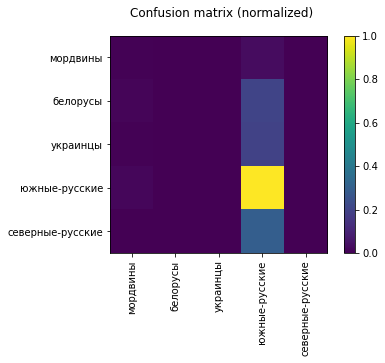

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [112]:
inputs = np.zeros((num, num))
names = ['?' for i in range(num)]
for i, n in enumerate(df['node_id1']):
    row = int(n.split('_')[1])
    col = int(df['node_id2'][i].split('_')[1])
    names[row] = n
    names[col] = df['node_id2'][i]
    inputs[row, col] = df['ibd_sum'][i]
    inputs[col, row] = df['ibd_sum'][i]

targets = get_targets(df, 0.9, names)

label_prop_model = LabelSpreading(kernel='rbf', n_neighbors=10, max_iter=10000, tol=1e-3, n_jobs=-1, gamma=0.0005)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

print(predicted)

##############################

unlabeled_targets = np.array(targets) == -1

targets = np.array(get_targets(df, 2, names)) # second number - whatever number > 1 because we need to select all data

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets[unlabeled_targets], predicted[unlabeled_targets], labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(5)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_cr.png", bbox_inches="tight")
plt.show()

for i in range(5):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()

### Old approach

{'мордвины': 24, 'белорусы': 162, 'украинцы': 149, 'южные-русские': 761, 'северные-русские': 220}
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
{'мордвины': 70, 'белорусы': 424, 'украинцы': 389, 'южные-русские': 2160, 'северные-русские': 628}
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        46
           1       0.34      0.56      0.42       262
           2       0.21      0.90      0.35       240
           3       0.94      0.51      0.66      1399
           4       0.89      0.31      0.46       408

    accuracy                           0.51      2355
   macro avg       0.68      0.47      0.39      2355
weighted avg       0.79      0.51      0.56      2355

[[   2   12   38    4   14]
 [   0  247  114   59    4]
 [   0   29  320   36    4]
 [   0  182  502 1466   10]
 [  

<Figure size 432x288 with 0 Axes>

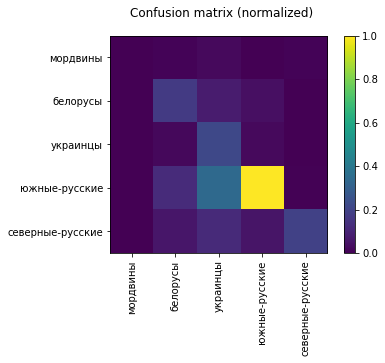

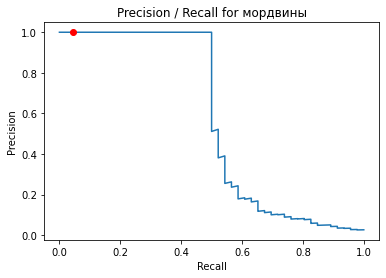

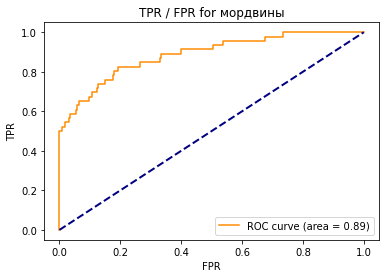

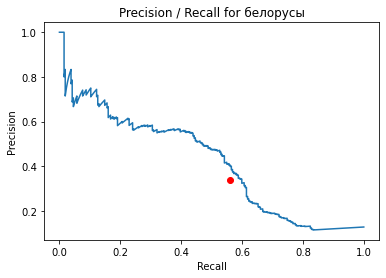

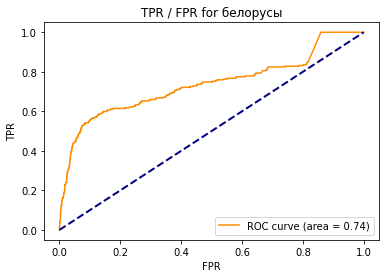

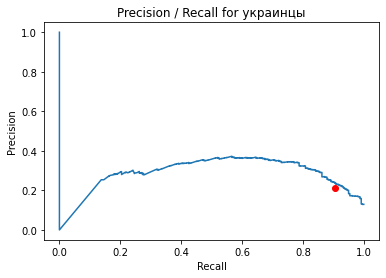

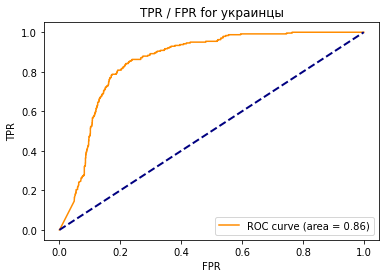

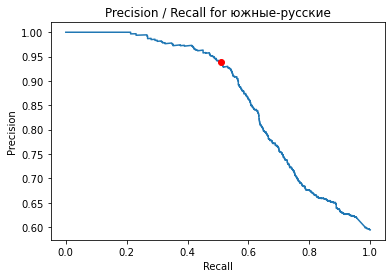

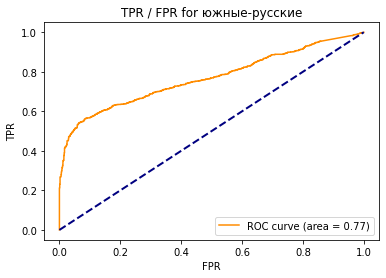

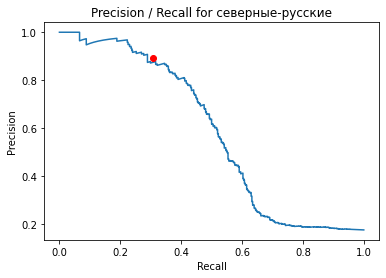

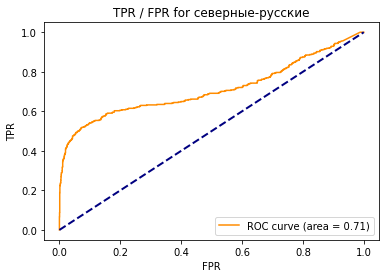

In [35]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            nodes_dict[n] = [types_dict.copy(), id_]
            
    print(current_types_dict)
    print(all_types_dict)
        
    return nodes_dict

data = get_dataset(df, 0.35) # second number - the part of training data

inputs = [list(i[0].values()) for i in list(data.values())]
targets = [i[1] for i in list(data.values())]

def rbf_kernel_safe(X, Y=None, gamma=None): 

    X, Y = sklearn.metrics.pairwise.check_pairwise_arrays(X, Y) 
    if gamma is None: 
        gamma = 1.0 / X.shape[1] 

    K = sklearn.metrics.pairwise.euclidean_distances(X, Y, squared=True) 
    K *= -gamma 
    K -= K.max()
    np.exp(K, K)    # exponentiate K in-place 
    return K 

label_prop_model = LabelSpreading(kernel='knn', n_neighbors=200, max_iter=1000, tol=1e-3, n_jobs=-1, gamma=0.001)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

unlabeled_targets = np.array(targets) == -1

data = get_dataset(df, 2) # second number - whatever number > 1 because we need to select all data

targets = np.array([i[1] for i in list(data.values())])

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets, predicted, labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(5)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_cr.png", bbox_inches="tight")
plt.show()

for i in range(5):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()

# Tensorflow

In [46]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, Concatenate, Dropout, BatchNormalization
import gc

In [41]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    selection = []
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
                selection.append(id_)
            else:
                selection.append(-1)
            nodes_dict[n] = [types_dict.copy(), id_]
            
        
    return nodes_dict, np.array(selection)

data, selection = get_dataset(df, 0.7)

inputs = np.array([list(i[0].values()) for i in list(data.values())])
targets = np.array([i[1] for i in list(data.values())])

train_inputs = inputs[selection != -1]
train_targets = targets[selection != -1]

test_inputs = inputs[selection == -1]
test_targets = targets[selection == -1]

train_targets

array([0, 0, 0, ..., 2, 2, 2])

In [69]:
inputs = Input(shape =(5,))

x0 = Dense(1024, activation = 'relu')(inputs)
x1 = Dense(1024, activation = 'relu')(inputs)
x2 = Dense(1024, activation = 'relu')(inputs)
x3 = Dense(1024, activation = 'relu')(inputs)

x = Concatenate()([
                x0, 
                x1, 
                x2,
                x3
               ])

x = Dense(5, activation = 'softmax')(x)

model = Model(inputs, x)

In [70]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                                  
 dense_33 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                                  
 dense_34 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                           

In [71]:
gc.collect()

lr = ReduceLROnPlateau(
                    monitor = "val_loss",
                    factor = 0.9, 
                    patience = 4, 
                    verbose = 0)

es = EarlyStopping(
                    monitor = "val_loss",
                    patience = 40, 
                    verbose = 0,
                    mode = "min", 
                    restore_best_weights = True)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                    filepath = './genotek',
                    save_weights_only = True,
                    monitor = 'val_loss',
                    mode = 'min',
                    save_best_only = True)

callbacks = [
                    lr, 
                    es, 
                    model_checkpoint_callback
                    ]

model.compile(
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = 'acc',
                loss = tf.keras.losses.SparseCategoricalCrossentropy()
                 )

    
model.fit(train_inputs,
                train_targets, 
                validation_data=(test_inputs,
                                test_targets), 
                epochs = 1000,
                verbose = 1,
                batch_size = 16,
                shuffle = True,
                callbacks = callbacks)

model.load_weights('./genotek')

predicted = np.argmax(model.predict(test_inputs), axis=1)

print(classification_report(test_targets, predicted))

Epoch 1/1000
165/165 [==============================] - 1s 5ms/step - loss: 5.6681 - acc: 0.8014 - val_loss: 4.1274 - val_acc: 0.3877 - lr: 0.0100
Epoch 2/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.4504 - acc: 0.8489 - val_loss: 3.3604 - val_acc: 0.3770 - lr: 0.0100
Epoch 3/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.5584 - acc: 0.8421 - val_loss: 4.8949 - val_acc: 0.3703 - lr: 0.0100
Epoch 4/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4622 - acc: 0.8462 - val_loss: 4.8226 - val_acc: 0.3934 - lr: 0.0100
Epoch 5/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4546 - acc: 0.8542 - val_loss: 4.2798 - val_acc: 0.3664 - lr: 0.0100
Epoch 6/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4398 - acc: 0.8622 - val_loss: 3.9673 - val_acc: 0.3838 - lr: 0.0100
Epoch 7/1000
165/165 [==============================] - 1s 3ms/step - loss: 0.4081 - acc: 0.8580 - val_loss: 4.8862 - 

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Torch Geometric

In [2]:
import torch
print(torch.__version__)
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn

1.13.0+cu116


## Vanillia example

In [3]:
import networkx as nx
from torch_geometric.utils.convert import from_networkx

In [180]:
G = nx.Graph()

# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'y': 0, 'x': [[0.5], [0.8], [0.9]]}),
      (2, {'y': 0, 'x': [[0.2], [0.8], [0.9]]}),
      (3, {'y': 1, 'x': [[0.3], [0.8], [0.9]]}),
      (4, {'y': 1, 'x': [[0.1], [0.8], [0.9]]}),
      (5, {'y': 1, 'x': [[0.2], [0.8], [0.9]]}),
])

# Add some edges
G.add_edges_from([
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4),
                  (3, 2), (3, 5),
                  (4, 1), (4, 2),
                  (5, 1), (5, 3)
])

# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(G)

pyg_graph.num_classes = 2

print(pyg_graph.num_features)

print(pyg_graph)
# Data(edge_index=[2, 12], x=[5], y=[5])
print(pyg_graph.x)
# tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
print(pyg_graph.y)
# tensor([1, 2, 3, 4, 5])
print(pyg_graph.edge_index)
# tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
#         [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


# # Split the data 
# train_ratio = 0.2
# num_nodes = pyg_graph.x.shape[0]
# num_train = int(num_nodes * train_ratio)
# idx = [i for i in range(num_nodes)]

# np.random.shuffle(idx)
# train_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
# train_mask[idx[:num_train]] = True
# test_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
# test_mask[idx[num_train:]] = True

# print(train_mask)
# # tensor([ True, False, False, False, False])
# print(test_mask)
# # tensor([False,  True,  True,  True,  True])

1
Data(x=[5, 3, 1], edge_index=[2, 12], y=[5], num_classes=2)
tensor([[[0.5000],
         [0.8000],
         [0.9000]],

        [[0.2000],
         [0.8000],
         [0.9000]],

        [[0.3000],
         [0.8000],
         [0.9000]],

        [[0.1000],
         [0.8000],
         [0.9000]],

        [[0.2000],
         [0.8000],
         [0.9000]]])
tensor([0, 0, 1, 1, 1])
tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


In [184]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features*3, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        print('GOOGLE1')
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        print('GOOGLE2')
        return F.log_softmax(x, dim=1)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
print(device)

data =  pyg_graph.to(device)

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out= model(data)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

for epoch in range(401):
    loss = train(data)
    print(loss)

cpu
GOOGLE1


RuntimeError: index 3 is out of bounds for dimension 0 with size 3

Testing vanilia example on different graph size

In [179]:
model.eval()
model(pyg_graph_big.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (18x1 and 3x16)

## Real example from scratch

In [4]:
from numba import njit, prange
import time
import seaborn as sns

In [5]:
from torch.nn import Linear

class AttnGCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GATConv(in_channels=5,
                             out_channels=15,
                             heads=2, 
                             add_self_loops=False,
                             edge_dim=1)
        self.fc1 = Linear(30, 15)
        self.fc2 = Linear(15, 5)

    def forward(self, data):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.conv1(x, edge_index, edge_weight)
        h = h.relu()
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        return h



In [6]:
import torch
from torch.nn import Linear, BatchNorm1d
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.norm = BatchNorm1d(5)
        self.conv1 = GCNConv(5, 15, 
                             add_self_loops=False,
                             normalize=True)
        self.conv2 = GCNConv(15, 15, 
                             add_self_loops=False,
                             normalize=True)
        self.fc1 = Linear(15, 15)
        self.fc2 = Linear(15, 15)
        self.fc3 = Linear(15, 5)

    def forward(self, data):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(x)
        h = self.conv1(h, edge_index, edge_weight)
        h = h.relu()
        h = self.conv2(h, edge_index, edge_weight)
        h = h.relu()
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h

In [7]:
import torch
from torch.nn import Linear, BatchNorm1d
from torch_geometric.nn import GCNConv

class SimpleNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.norm = BatchNorm1d(5)
        self.fc1 = Linear(5, 15)
        self.fc2 = Linear(15, 15)
        self.fc3 = Linear(15, 5)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h

Raw data

In [5]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


Function for getting train and test nodes

In [6]:
def get_train_test_nodes(df, train_coeff, mask_coeff, NC=False):
    
    # get list of all labels
    types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
    print("TYPES: ", types)
    
    # concatenate all nodes in one column
    n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
    
    # concatenate all labels in one column
    l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
    
    # merge all nodes and all labels column-wise
    df_new = pd.concat([n, l], axis=1)
    
    # get class for every node 
    df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
    df_new = df_new.drop_duplicates()
    node_classes_random = df_new.sample(frac=1)
    node_classes_sorted = df_new.sort_values(by=[0])
    
    if NC:
        missed_nodes = []
        for i in range(node_classes_sorted.shape[0]):
            if i not in node_classes_sorted.iloc[:, 0].to_numpy():
                missed_nodes.append([i, -1])
        
        tmp_df = pd.DataFrame(missed_nodes)
        
        print(tmp_df)
        
        node_classes_sorted = pd.concat([node_classes_sorted, tmp_df], axis=0).sort_values(by=[0])
    
    # get number of nodes for every class
    num_nodes_per_class = node_classes_random.iloc[:, 1].value_counts()
    
    train_nodes, test_nodes = [], []
    node_counter = {i:0 for i in range(num_nodes_per_class.shape[0])}
    
    # add masking
    mask_array = []
    
    # split nodes
    for i in range(node_classes_random.shape[0]):
        node_class = node_classes_random.iloc[i, 1]
        if node_counter[node_class] < int(train_coeff * num_nodes_per_class.loc[node_class]):
            train_nodes.append(node_classes_random.iloc[i, 0])
            
            if node_counter[node_class] >= int(mask_coeff * train_coeff * num_nodes_per_class.loc[node_class]):
                mask_array.append(True)
            else:
                mask_array.append(False)
            
            node_counter[node_class] += 1
        else:
            test_nodes.append(node_classes_random.iloc[i, 0])
    
    return train_nodes, test_nodes, node_classes_sorted, mask_array

def make_train_test_dataset(df, train_nodes: list, test_nodes: list, node_classes_sorted, mask_array):
    
    train_mask_array = mask_array
    
    # get list of all labels
    types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
    print("TYPES: ", types)
    
    # preprocess initial data
    df_processed = df.copy()
    df_processed.iloc[:, 0] = df_processed.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_processed.iloc[:, 1] = df_processed.iloc[:, 1].apply(lambda n: int(n.split('_')[1]))
    df_processed.iloc[:, 2] = df_processed.iloc[:, 2].apply(lambda t: types.index(t))
    df_processed.iloc[:, 3] = df_processed.iloc[:, 3].apply(lambda t: types.index(t))
    
    # making dataframe with only training nodes
    df_for_training = df_processed.copy()
    
    drop_rows = drop_rows_for_training_dataset(df_for_training.to_numpy(), np.array(test_nodes))
    
    df_for_training = df_for_training.drop(drop_rows)
    
    # construct training graph ############################# SAME PART BELOW ##############################
    
    # construct hash map for training nodes
    hashmap = np.array([1e6 for i in range(len(node_classes_sorted))]).astype(int)
    for i, node in enumerate(train_nodes):
        hashmap[node] = i
        
    print(hashmap)
    
    # calculate sum of idb for each training node
    sum_training_idb = np.zeros((len(train_nodes), len(types)))
    
    calculate_sum_of_idb_for_each_node(sum_training_idb, df_for_training.to_numpy(), hashmap, np.array(train_mask_array))
        
    print(node_classes_sorted)
                
    # construct targets
    targets = construct_node_classes(node_classes_sorted.to_numpy(), train_nodes)
        
    # construct edges
    train_graph_weighted_edges = construct_edges(df_for_training.to_numpy(), hashmap)
    
    sort_idx = np.argsort(train_graph_weighted_edges[:, 0])
    train_graph_weighted_edges = train_graph_weighted_edges[sort_idx]
    
    train_graph_pytorch = Data.from_dict({'y': torch.tensor(targets, dtype=torch.long), 'x': torch.tensor(sum_training_idb), 'weight': torch.tensor(train_graph_weighted_edges[:, 2]), 'edge_index': torch.tensor(train_graph_weighted_edges[:, :2].T, dtype=torch.long)})
    
    train_graph_pytorch.num_classes = len(types)
    
    ############################# SAME PART UP ##############################
    
    # creating array of graphs for testing
    
    array_of_graphs_for_testing = []
    
    print('Starting selecting lines...')
    
    start = time.time()
    
    rows_for_adding_per_node = select_lines(np.array(train_nodes), np.array(test_nodes), df_processed.to_numpy())
    
    end = time.time()
    
    print(f'Done selecting lines in {end-start} seconds')
    
    for k, test_node in enumerate(test_nodes):
        
        print(f'Processed {k} / {len(test_nodes)} nodes')
        
        test_mask_array = train_mask_array + [True]
        
        rows_for_adding = rows_for_adding_per_node[k]
                
        df_for_testing = pd.concat([df_for_training, df_processed.iloc[rows_for_adding]], axis=0)
        
        current_test_nodes = train_nodes + [test_node]
        
        # construct testing graph ############################# SAME PART BELOW ##############################
    
        start = time.time()
        
        # construct hash map for training nodes
        hashmap = np.array([1e6 for i in range(len(node_classes_sorted))]).astype(int)
        for i, node in enumerate(current_test_nodes):
            hashmap[node] = i
    
        # calculate sum of idb for each training node
        sum_testing_idb = np.zeros((len(current_test_nodes), len(types)))
    
        calculate_sum_of_idb_for_each_node(sum_testing_idb, df_for_testing.to_numpy(), hashmap, np.array(test_mask_array))
            
        print(f'calculate sum of idb for each training node: {time.time() - start}')
        
        start = time.time()

        # construct targets
        targets = construct_node_classes(node_classes_sorted.to_numpy(), current_test_nodes)
            
        print(f'construct targets: {time.time() - start}')
        
        start = time.time()

        # construct edges
        test_graph_weighted_edges = construct_edges(df_for_testing.to_numpy(), hashmap)
        
        sort_idx = np.argsort(test_graph_weighted_edges[:, 0])
        test_graph_weighted_edges = test_graph_weighted_edges[sort_idx]
            
        print(f'construct edges: {time.time() - start}')
        
#         start = time.time()

        test_graph_pytorch = Data.from_dict({'y': torch.tensor(targets, dtype=torch.long), 'x': torch.tensor(sum_testing_idb), 'weight': torch.tensor(test_graph_weighted_edges[:, 2]), 'edge_index': torch.tensor(test_graph_weighted_edges[:, :2].T, dtype=torch.long)})
        
        test_graph_pytorch.num_classes = len(types)
        
        array_of_graphs_for_testing.append(test_graph_pytorch)
        
#         print(f'build pytorch geometric dataset: {time.time() - start}')
        
        ############################# SAME PART UP ##############################
    
    return train_graph_pytorch, array_of_graphs_for_testing, types

In [7]:
@njit(cache=True)
def select_lines(train_nodes, test_nodes, df_processed):
    
    rows_for_adding_per_node = []
    
    for i in range(len(test_nodes)):
        tmp = []
        for j in range(df_processed.shape[0]):
            row = df_processed[j]
            if int(row[0]) == test_nodes[i] and int(row[1]) in train_nodes or int(row[1]) == test_nodes[i] and int(row[0]) in train_nodes:
                
                tmp.append(j)
                
        rows_for_adding_per_node.append(tmp)
    
    return rows_for_adding_per_node


@njit(cache=True)
def calculate_sum_of_idb_for_each_node(sum_testing_ibd, df_for_testing, hashmap, mask_array):
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        if mask_array[hashmap[int(row[0])]]:
            sum_testing_ibd[hashmap[int(row[0])], int(row[3])] += row[4]
            sum_testing_ibd[hashmap[int(row[1])], int(row[2])] += row[4]


@njit(cache=True)
def construct_edges(df_for_testing, hashmap):
    
    test_graph_weighted_edges = []
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        test_graph_weighted_edges.append([hashmap[int(row[0])], hashmap[int(row[1])], row[4]])
        test_graph_weighted_edges.append([hashmap[int(row[1])], hashmap[int(row[0])], row[4]])
        
    return np.array(test_graph_weighted_edges)


@njit(cache=True)
def drop_rows_for_training_dataset(df_for_training, test_nodes):
    drop_rows = []
    for i in range(df_for_training.shape[0]): # speed it up in future
        if i % 1000 == 0:
            print(f'Processed {i} / {df_for_training.shape[0]} lines for training dataset')
        row = df_for_training[i, :]
        if int(row[0]) in test_nodes or int(row[1]) in test_nodes:
            drop_rows.append(i)
            
    return drop_rows


@njit(cache=True)
def construct_node_classes(node_classes_sorted, current_nodes):
    targets = []
    for node in current_nodes:
        targets.append(node_classes_sorted[node, 1])
        
    return targets
    

Special functions for metis

In [67]:
def parse_metis_file_to_dataframe(path):
    
    data = []
    types = ['Central-Russia', 'Jews']
    
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            if i % 10000 == 0:
                print(f"Done {i} / lines")
            tmp = []
            if i != 0:
                items = line.split(',')
                
                node1 = items[0]
                node2 = items[1]
                ibd = float(items[2])
                
                if items[3][0] == "\"":
                    node1_p1 = items[3].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    node1_p2 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                    if float(node1_p1[1]) > float(node1_p2[1]): #50% / 50% ???
                        node1_type = types.index(node1_p1[0])
                    else:
                        node1_type = types.index(node1_p2[0])
                        
                    if items[5][0] == "\"":
                        node2_p1 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                        node2_p2 = items[6].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")

                        if float(node2_p1[1]) > float(node2_p2[1]): #50% / 50% ???
                            node2_type = types.index(node2_p1[0])
                        else:
                            node2_type = types.index(node2_p2[0])
                            
                    else:
                        node2_p1 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                        node2_type = types.index(node2_p1[0])
                    
                else:
                    node1_p1 = items[3].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                    node1_type = types.index(node1_p1[0])
                    
                    if items[4][0] == "\"":
                        node2_p1 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                        node2_p2 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")

                        if float(node2_p1[1]) > float(node2_p2[1]): #50% / 50% ???
                            node2_type = types.index(node2_p1[0])
                        else:
                            node2_type = types.index(node2_p2[0])
                            
                    else:
                        node2_p1 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').split(":")
                    
                        node2_type = types.index(node2_p1[0])
                    
                    
                tmp = [node1, node2, node1_type, node2_type, ibd]
                data.append(tmp)
    
    return pd.DataFrame(data, columns=['node_id1', 'node_id2', 'label_id1', 'label_id2', 'ibd_sum'])

In [252]:
from collections import defaultdict
from typing import Any, Iterable, List, Optional, Tuple, Union
from torch import Tensor
import networkx as nx
from torch_geometric.data import Data

def from_networkx_numba_edition(G, group_node_attrs = None, group_edge_attrs = None):

    start = time.time()
    
    G = nx.convert_node_labels_to_integers(G)
#     print('1' if not nx.is_directed(G) else '2')
#     G = G.to_directed() if not nx.is_directed(G) else G
    
    print(list(G.nodes))
    print(list(G.edges))
    
    print(f'CUSTOM 1_0: {time.time() - start}')
    start = time.time()

    if isinstance(G, (nx.MultiGraph, nx.MultiDiGraph)):
        edges = list(G.edges(keys=False))
    else:
        edges = list(G.edges)
        
    print(f'CUSTOM 1_1: {time.time() - start}')
    start = time.time()

    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    
    print(f'CUSTOM 1_2: {time.time() - start}')
    start = time.time()

    data = defaultdict(list)

    if G.number_of_nodes() > 0:
        node_attrs = list(next(iter(G.nodes(data=True)))[-1].keys())
    else:
        node_attrs = {}
        
    print(f'CUSTOM 1_3: {time.time() - start}')
    start = time.time()

    if G.number_of_edges() > 0:
        edge_attrs = list(next(iter(G.edges(data=True)))[-1].keys())
    else:
        edge_attrs = {}
    
    print(f'CUSTOM 1_4: {time.time() - start}')
    start = time.time()
        
#     print(G.nodes(data=True))

    for i, (_, feat_dict) in enumerate(G.nodes(data=True)): 
        if set(feat_dict.keys()) != set(node_attrs):
            raise ValueError('Not all nodes contain the same attributes')
        for key, value in feat_dict.items():
            data[str(key)].append(value)
            
    print(f'CUSTOM 2: {time.time() - start}')
    start = time.time()
            
#     print('DATA:', data)
#     print('NODE ATTR:', node_attrs)
    
#     print(G.edges(data=True))
    
#     for i, (_, _, feat_dict) in enumerate(G.edges(data=True)): 
#         if set(feat_dict.keys()) != set(edge_attrs):
#             raise ValueError('Not all edges contain the same attributes')
# #         print(feat_dict)
#         data['weight'].append(feat_dict['weight'])
    
    print(f'CUSTOM 3: {time.time() - start}')
    start = time.time()

    for i, (_, _, feat_dict) in enumerate(G.edges(data=True)): 
        if set(feat_dict.keys()) != set(edge_attrs):
            raise ValueError('Not all edges contain the same attributes')
#         print(feat_dict)
        for key, value in feat_dict.items():
            key = f'edge_{key}' if key in node_attrs else key
            data[str(key)].append(value)
            
#     print('DATA:', data)

    for key, value in G.graph.items():
        key = f'graph_{key}' if key in node_attrs else key
        data[str(key)] = value
        
    print(f'CUSTOM 4: {time.time() - start}')
    start = time.time()

    for key, value in data.items():
        if isinstance(value, (tuple, list)) and isinstance(value[0], Tensor):
            data[key] = torch.stack(value, dim=0)
        else:
            try:
                data[key] = torch.tensor(value)
            except (ValueError, TypeError):
                pass
            
    print(f'CUSTOM 5: {time.time() - start}')
    start = time.time()

    data['edge_index'] = edge_index.view(2, -1)
    print(data)
    data = Data.from_dict(data)

    if group_node_attrs is all:
        group_node_attrs = list(node_attrs)
    if group_node_attrs is not None:
        xs = []
        for key in group_node_attrs:
            x = data[key]
            x = x.view(-1, 1) if x.dim() <= 1 else x
            xs.append(x)
            del data[key]
        data.x = torch.cat(xs, dim=-1)
        
    print(f'CUSTOM 6: {time.time() - start}')
    start = time.time()

    if group_edge_attrs is all:
        group_edge_attrs = list(edge_attrs)
    if group_edge_attrs is not None:
        xs = []
        for key in group_edge_attrs:
            key = f'edge_{key}' if key in node_attrs else key
            x = data[key]
            x = x.view(-1, 1) if x.dim() <= 1 else x
            xs.append(x)
            del data[key]
        data.edge_attr = torch.cat(xs, dim=-1)
        
    print(f'CUSTOM 7: {time.time() - start}')

    if data.x is None and data.pos is None:
        data.num_nodes = G.number_of_nodes()

    return data

In [254]:
G = nx.DiGraph()

# Add some cars (just do 4 for now)
# G.add_nodes_from([
#       (1, {'y': 0, 'x': [0.5, 0.8, 0.9]}), # is it possible to get rid of dict as data?
#       (2, {'y': 0, 'x': [0.2, 0.8, 0.9]}),
#       (3, {'y': 1, 'x': [0.3, 0.8, 0.9]}),
#       (4, {'y': 1, 'x': [0.1, 0.8, 0.9]}),
#       (5, {'y': 1, 'x': [0.2, 0.8, 0.9]}),
#       (7, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
#       (800, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
#       (100, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
# ])
n = [(i, {'y': 0, 'x': [0.5, 0.8, 0.9+i]}) for i in range(39, 9, -1)]

start = time.time()
G.add_nodes_from(n)
print(f'add nodes: {time.time() - start}')

# Add some edges
# G.add_weighted_edges_from([
#                   (1, 2, 91), (1, 2, 91), (1, 4, 92), (1, 5, 93),
#                   (2, 3, 94), (2, 4, 95),
#                   (3, 2, 96), (3, 5, 97),
#                   (4, 1, 98), (4, 2, 99),
#                   (5, 1, 100), (5, 3, 101), (5,2, 102), (7, 2, 103), (800, 100, 104), (100, 1, 105)
# ])
e = [(i, i+1, 100+i) for i in range(10, 40 - 1)] + [(i+1, i, 100+i) for i in range(10, 40 - 1)]

start = time.time()
G.add_weighted_edges_from(e)
print(f'add edges: {time.time() - start}')

#G.add_weighted_edges_from

# Convert the graph into PyTorch geometric
pyg_graph_big = from_networkx_numba_edition(G)
pyg_graph_big.edge_index


add nodes: 0.0
add edges: 0.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (7, 8), (8, 7), (8, 9), (9, 8), (9, 10), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 14), (15, 16), (16, 15), (16, 17), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (19, 20), (20, 19), (20, 21), (21, 20), (21, 22), (22, 21), (22, 23), (23, 22), (23, 24), (24, 23), (24, 25), (25, 24), (25, 26), (26, 25), (26, 27), (27, 26), (27, 28), (28, 27), (28, 29), (29, 28)]
CUSTOM 1_0: 0.0
CUSTOM 1_1: 0.0
CUSTOM 1_2: 0.0
CUSTOM 1_3: 0.0
CUSTOM 1_4: 0.00049591064453125
CUSTOM 2: 0.0
CUSTOM 3: 0.0
CUSTOM 4: 0.0
CUSTOM 5: 0.0
defaultdict(<class 'list'>, {'y': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]), 'x': tensor([[ 0.5000,

tensor([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18,
         18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27,
         27, 28, 28, 29],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 16, 18, 17,
         19, 18, 20, 19, 21, 20, 22, 21, 23, 22, 24, 23, 25, 24, 26, 25, 27, 26,
         28, 27, 29, 28]])

In [125]:
a = defaultdict(list)
a['b'].append(10)
a

defaultdict(list, {'b': [10]})

In [108]:
@njit
def foo(tmp):
    d = dict()
    a = np.array([1, 2])
    k = {1: a, 2: a}
    # The following tells the compiler what the key type and the
    # value
    # type are for `d`.
    d[3] = np.arange(3)
    d[5] = np.arange(5)
    t = list(k[1])
    t.append(3)
    t = np.array(t)
    k[1] = t
    return d, k

tmp = {'weight': 91}

d, k = foo(tmp)
print(d)    # {3: [0 1 2], 5: [0 1 2 3 4]}
print(k)    # {1: [0], 2: [0 1]}

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at C:\Users\Alex\AppData\Local\Temp\ipykernel_21132\3049721017.py (3)[0m
[1m
File "..\..\AppData\Local\Temp\ipykernel_21132\3049721017.py", line 3:[0m
[1m<source missing, REPL/exec in use?>[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'dict'>[0m


In [200]:
@njit
def foo(tmp):
    tmp[0] = 100

tmp = np.array([0, 0])
foo(tmp)
tmp

array([100,   0])

In [285]:
metis_df = parse_metis_file_to_dataframe('CR_Jews_graph_weights_labels.csv')

Done 0 / lines
Done 10000 / lines
Done 20000 / lines
Done 30000 / lines
Done 40000 / lines
Done 50000 / lines
Done 60000 / lines
Done 70000 / lines
Done 80000 / lines
Done 90000 / lines
Done 100000 / lines
Done 110000 / lines
Done 120000 / lines
Done 130000 / lines
Done 140000 / lines
Done 150000 / lines
Done 160000 / lines
Done 170000 / lines
Done 180000 / lines
Done 190000 / lines
Done 200000 / lines
Done 210000 / lines
Done 220000 / lines
Done 230000 / lines
Done 240000 / lines
Done 250000 / lines
Done 260000 / lines
Done 270000 / lines
Done 280000 / lines
Done 290000 / lines
Done 300000 / lines
Done 310000 / lines
Done 320000 / lines
Done 330000 / lines
Done 340000 / lines
Done 350000 / lines
Done 360000 / lines
Done 370000 / lines
Done 380000 / lines
Done 390000 / lines
Done 400000 / lines
Done 410000 / lines
Done 420000 / lines
Done 430000 / lines
Done 440000 / lines
Done 450000 / lines
Done 460000 / lines
Done 470000 / lines
Done 480000 / lines
Done 490000 / lines
Done 500000 / 

In [286]:
metis_df

,node_id1,node_id2,label_id1,label_id2,ibd_sum
0,node_0,node_119,0,0,12.45480
1,node_0,node_284,0,0,9.51299
2,node_0,node_291,0,0,9.05144
3,node_0,node_306,0,0,16.99570
4,node_0,node_813,0,0,10.10270
...,...,...,...,...,...
1250451,node_10962,node_10984,1,1,25.42430
1250452,node_10963,node_10976,0,1,12.79950
1250453,node_10969,node_10985,0,0,9.86943
1250454,node_10983,node_10985,1,0,8.44684


In [21]:
a = "[{'Central-Russia': 100.0}]".replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').split(": ")
a

['Central-Russia', '100.0']

In [8]:
tr, ts, nks, mask_array = get_train_test_nodes(df, 0.2, mask_coeff=0.0, NC=False) # to-do: 70:30 split ration because kenenbek did it this way
data, test_graphs, types = make_train_test_dataset(df, tr, ts, nks, mask_array)

TYPES:  ['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']
TYPES:  ['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']
Processed 0 / 67503 lines for training dataset
Processed 1000 / 67503 lines for training dataset
Processed 2000 / 67503 lines for training dataset
Processed 3000 / 67503 lines for training dataset
Processed 4000 / 67503 lines for training dataset
Processed 5000 / 67503 lines for training dataset
Processed 6000 / 67503 lines for training dataset
Processed 7000 / 67503 lines for training dataset
Processed 8000 / 67503 lines for training dataset
Processed 9000 / 67503 lines for training dataset
Processed 10000 / 67503 lines for training dataset
Processed 11000 / 67503 lines for training dataset
Processed 12000 / 67503 lines for training dataset
Processed 13000 / 67503 lines for training dataset
Processed 14000 / 67503 lines for training dataset
Processed 15000 / 67503 lines for training dataset
Processed 16000 / 67503 lines for

calculate sum of idb for each training node: 0.0009930133819580078
construct targets: 0.0010187625885009766
construct edges: 0.0014600753784179688
Processed 55 / 3015 nodes
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0009639263153076172
construct edges: 0.0014879703521728516
Processed 56 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009915828704833984
construct edges: 0.0014882087707519531
Processed 57 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009915828704833984
construct edges: 0.0014879703521728516
Processed 58 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009918212890625
construct edges: 0.0010194778442382812
Processed 59 / 3015 nodes
calculate sum of idb for each training node: 0.000989675521850586
construct targets: 0.0004963874816894531
construct edges: 0.001488924026489257

calculate sum of idb for each training node: 0.0009658336639404297
construct targets: 0.0009920597076416016
construct edges: 0.0014879703521728516
Processed 111 / 3015 nodes
calculate sum of idb for each training node: 0.0004723072052001953
construct targets: 0.0009908676147460938
construct edges: 0.0015120506286621094
Processed 112 / 3015 nodes
calculate sum of idb for each training node: 0.0005068778991699219
construct targets: 0.0009579658508300781
construct edges: 0.0015118122100830078
Processed 113 / 3015 nodes
calculate sum of idb for each training node: 0.0004932880401611328
construct targets: 0.0009968280792236328
construct edges: 0.0014853477478027344
Processed 114 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0009922981262207031
construct edges: 0.0009677410125732422
Processed 115 / 3015 nodes
calculate sum of idb for each training node: 0.0004985332489013672
construct targets: 0.0009891986846923828
construct edges: 0.000992

calculate sum of idb for each training node: 0.0009639263153076172
construct targets: 0.0010221004486083984
construct edges: 0.0014579296112060547
Processed 168 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009918212890625
construct edges: 0.0014879703521728516
Processed 169 / 3015 nodes
calculate sum of idb for each training node: 0.0004968643188476562
construct targets: 0.0009913444519042969
construct edges: 0.00148773193359375
Processed 170 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009918212890625
construct edges: 0.0014882087707519531
Processed 171 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009930133819580078
construct edges: 0.00148773193359375
Processed 172 / 3015 nodes
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.0010194778442382812
construct edges: 0.00148844718933105

construct edges: 0.0019571781158447266
Processed 225 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009915828704833984
construct edges: 0.0014879703521728516
Processed 226 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0009922981262207031
construct edges: 0.0014884471893310547
Processed 227 / 3015 nodes
calculate sum of idb for each training node: 0.0004975795745849609
construct targets: 0.0004954338073730469
construct edges: 0.0014889240264892578
Processed 228 / 3015 nodes
calculate sum of idb for each training node: 0.0010187625885009766
construct targets: 0.0009653568267822266
construct edges: 0.0015153884887695312
Processed 229 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009920597076416016
construct edges: 0.0014884471893310547
Processed 230 / 3015 nodes
calculate sum of idb for each training node: 0.0004944801330566406

calculate sum of idb for each training node: 0.0009682178497314453
construct targets: 0.0009920597076416016
construct edges: 0.001020193099975586
Processed 282 / 3015 nodes
calculate sum of idb for each training node: 0.0009899139404296875
construct targets: 0.0009684562683105469
construct edges: 0.0010154247283935547
Processed 283 / 3015 nodes
calculate sum of idb for each training node: 0.0004940032958984375
construct targets: 0.0009894371032714844
construct edges: 0.0014908313751220703
Processed 284 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009677410125732422
construct edges: 0.0015146732330322266
Processed 285 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0009927749633789062
construct edges: 0.0009951591491699219
Processed 286 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0009679794311523438
construct edges: 0.001514

construct edges: 0.0014872550964355469
Processed 337 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0009915828704833984
construct edges: 0.0009920597076416016
Processed 338 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0004951953887939453
construct edges: 0.0010144710540771484
Processed 339 / 3015 nodes
calculate sum of idb for each training node: 0.001020669937133789
construct targets: 0.0009622573852539062
construct edges: 0.001020193099975586
Processed 340 / 3015 nodes
calculate sum of idb for each training node: 0.0009884834289550781
construct targets: 0.0009639263153076172
construct edges: 0.0010178089141845703
Processed 341 / 3015 nodes
calculate sum of idb for each training node: 0.0004673004150390625
construct targets: 0.001020193099975586
construct edges: 0.0014598369598388672
Processed 342 / 3015 nodes
calculate sum of idb for each training node: 0.0010030269622802734
con

calculate sum of idb for each training node: 0.0009675025939941406
construct targets: 0.0004966259002685547
construct edges: 0.0015120506286621094
Processed 392 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009672641754150391
construct edges: 0.0014884471893310547
Processed 393 / 3015 nodes
calculate sum of idb for each training node: 0.0009682178497314453
construct targets: 0.0010154247283935547
construct edges: 0.0009925365447998047
Processed 394 / 3015 nodes
calculate sum of idb for each training node: 0.000522613525390625
construct targets: 0.0009894371032714844
construct edges: 0.0014646053314208984
Processed 395 / 3015 nodes
calculate sum of idb for each training node: 0.0004668235778808594
construct targets: 0.0009915828704833984
construct edges: 0.0015120506286621094
Processed 396 / 3015 nodes
calculate sum of idb for each training node: 0.0009958744049072266
construct targets: 0.0009644031524658203
construct edges: 0.001488

calculate sum of idb for each training node: 0.0004949569702148438
construct targets: 0.0010199546813964844
construct edges: 0.0019562244415283203
Processed 444 / 3015 nodes
calculate sum of idb for each training node: 0.0010197162628173828
construct targets: 0.0004966259002685547
construct edges: 0.0014605522155761719
Processed 445 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0009648799896240234
construct edges: 0.0009915828704833984
Processed 446 / 3015 nodes
calculate sum of idb for each training node: 0.0009634494781494141
construct targets: 0.0010218620300292969
construct edges: 0.001489400863647461
Processed 447 / 3015 nodes
calculate sum of idb for each training node: 0.0004973411560058594
construct targets: 0.0009641647338867188
construct edges: 0.00148773193359375
Processed 448 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.00048160552978515625
construct edges: 0.00150728

construct edges: 0.0019834041595458984
Processed 495 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0010204315185546875
construct edges: 0.0014891624450683594
Processed 496 / 3015 nodes
calculate sum of idb for each training node: 0.0004982948303222656
construct targets: 0.0009920597076416016
construct edges: 0.0014600753784179688
Processed 497 / 3015 nodes
calculate sum of idb for each training node: 0.0004935264587402344
construct targets: 0.0009922981262207031
construct edges: 0.0014927387237548828
Processed 498 / 3015 nodes
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.0009946823120117188
construct edges: 0.0014574527740478516
Processed 499 / 3015 nodes
calculate sum of idb for each training node: 0.0005233287811279297
construct targets: 0.0009922981262207031
construct edges: 0.0014603137969970703
Processed 500 / 3015 nodes
calculate sum of idb for each training node: 0.00052905082702636

calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0009918212890625
construct edges: 0.0014889240264892578
Processed 548 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0009925365447998047
construct edges: 0.0014891624450683594
Processed 549 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009918212890625
construct edges: 0.0014600753784179688
Processed 550 / 3015 nodes
calculate sum of idb for each training node: 0.00048828125
construct targets: 0.0009953975677490234
construct edges: 0.0014870166778564453
Processed 551 / 3015 nodes
calculate sum of idb for each training node: 0.0010211467742919922
construct targets: 0.0009624958038330078
construct edges: 0.0009927749633789062
Processed 552 / 3015 nodes
calculate sum of idb for each training node: 0.000522613525390625
construct targets: 0.000995635986328125
construct edges: 0.0014569759368896484
P

construct edges: 0.0014872550964355469
Processed 602 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0010223388671875
construct edges: 0.0009968280792236328
Processed 603 / 3015 nodes
calculate sum of idb for each training node: 0.0010478496551513672
construct targets: 0.0009369850158691406
construct edges: 0.001512289047241211
Processed 604 / 3015 nodes
calculate sum of idb for each training node: 0.0004971027374267578
construct targets: 0.0009922981262207031
construct edges: 0.001476287841796875
Processed 605 / 3015 nodes
calculate sum of idb for each training node: 0.0009672641754150391
construct targets: 0.00049591064453125
construct edges: 0.0009925365447998047
Processed 606 / 3015 nodes
calculate sum of idb for each training node: 0.0010159015655517578
construct targets: 0.0009672641754150391
construct edges: 0.0014889240264892578
Processed 607 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construc

Processed 655 / 3015 nodes
calculate sum of idb for each training node: 0.0005199909210205078
construct targets: 0.0009677410125732422
construct edges: 0.0015115737915039062
Processed 656 / 3015 nodes
calculate sum of idb for each training node: 0.0004990100860595703
construct targets: 0.0009887218475341797
construct edges: 0.0014913082122802734
Processed 657 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0009932518005371094
construct edges: 0.001474142074584961
Processed 658 / 3015 nodes
calculate sum of idb for each training node: 0.0005202293395996094
construct targets: 0.0009922981262207031
construct edges: 0.001489877700805664
Processed 659 / 3015 nodes
calculate sum of idb for each training node: 0.0004885196685791016
construct targets: 0.0009915828704833984
construct edges: 0.0014636516571044922
Processed 660 / 3015 nodes
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.00101709365844726

construct edges: 0.0010242462158203125
Processed 711 / 3015 nodes
calculate sum of idb for each training node: 0.0009906291961669922
construct targets: 0.0004954338073730469
construct edges: 0.0014889240264892578
Processed 712 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009918212890625
construct edges: 0.0014879703521728516
Processed 713 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0004961490631103516
construct edges: 0.0014882087707519531
Processed 714 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0004961490631103516
construct edges: 0.00148773193359375
Processed 715 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0010199546813964844
construct edges: 0.0014882087707519531
Processed 716 / 3015 nodes
calculate sum of idb for each training node: 0.0004985332489013672
co

calculate sum of idb for each training node: 0.0009627342224121094
construct targets: 0.0010197162628173828
construct edges: 0.000993490219116211
Processed 768 / 3015 nodes
calculate sum of idb for each training node: 0.0009675025939941406
construct targets: 0.0010161399841308594
construct edges: 0.0009915828704833984
Processed 769 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0009922981262207031
construct edges: 0.0009679794311523438
Processed 770 / 3015 nodes
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0009925365447998047
construct edges: 0.000993490219116211
Processed 771 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0010173320770263672
construct edges: 0.0014634132385253906
Processed 772 / 3015 nodes
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.001004934310913086
construct edges: 0.00147485

construct edges: 0.0009918212890625
Processed 824 / 3015 nodes
calculate sum of idb for each training node: 0.0009911060333251953
construct targets: 0.0004961490631103516
construct edges: 0.001004934310913086
Processed 825 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0009992122650146484
construct edges: 0.0014853477478027344
Processed 826 / 3015 nodes
calculate sum of idb for each training node: 0.0004923343658447266
construct targets: 0.0009648799896240234
construct edges: 0.0015125274658203125
Processed 827 / 3015 nodes
calculate sum of idb for each training node: 0.0009663105010986328
construct targets: 0.0009920597076416016
construct edges: 0.0015113353729248047
Processed 828 / 3015 nodes
calculate sum of idb for each training node: 0.0009865760803222656
construct targets: 0.000997781753540039
construct edges: 0.0009915828704833984
Processed 829 / 3015 nodes
calculate sum of idb for each training node: 0.0004932880401611328
co

construct edges: 0.0009944438934326172
Processed 880 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0010159015655517578
construct edges: 0.0014884471893310547
Processed 881 / 3015 nodes
calculate sum of idb for each training node: 0.0009944438934326172
construct targets: 0.0009887218475341797
construct edges: 0.0009679794311523438
Processed 882 / 3015 nodes
calculate sum of idb for each training node: 0.0004971027374267578
construct targets: 0.0009684562683105469
construct edges: 0.001512289047241211
Processed 883 / 3015 nodes
calculate sum of idb for each training node: 0.0009684562683105469
construct targets: 0.0004947185516357422
construct edges: 0.0014889240264892578
Processed 884 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009675025939941406
construct edges: 0.0015149116516113281
Processed 885 / 3015 nodes
calculate sum of idb for each training node: 0.0005006790161132812


construct edges: 0.001466989517211914
Processed 932 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0010166168212890625
construct edges: 0.0014948844909667969
Processed 933 / 3015 nodes
calculate sum of idb for each training node: 0.0005199909210205078
construct targets: 0.0004951953887939453
construct edges: 0.0014913082122802734
Processed 934 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0010170936584472656
construct edges: 0.00148773193359375
Processed 935 / 3015 nodes
calculate sum of idb for each training node: 0.0009930133819580078
construct targets: 0.0004699230194091797
construct edges: 0.0015134811401367188
Processed 936 / 3015 nodes
calculate sum of idb for each training node: 0.0009868144989013672
construct targets: 0.0009922981262207031
construct edges: 0.0009670257568359375
Processed 937 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
co

calculate sum of idb for each training node: 0.00048160552978515625
construct targets: 0.0004956722259521484
construct edges: 0.0014884471893310547
Processed 983 / 3015 nodes
calculate sum of idb for each training node: 0.0010204315185546875
construct targets: 0.0004978179931640625
construct edges: 0.001486063003540039
Processed 984 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.000990152359008789
construct edges: 0.001489400863647461
Processed 985 / 3015 nodes
calculate sum of idb for each training node: 0.0009641647338867188
construct targets: 0.0005230903625488281
construct edges: 0.0014879703521728516
Processed 986 / 3015 nodes
calculate sum of idb for each training node: 0.0004680156707763672
construct targets: 0.0010190010070800781
construct edges: 0.0014889240264892578
Processed 987 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0009889602661132812
construct edges: 0.00148

calculate sum of idb for each training node: 0.0010199546813964844
construct targets: 0.0004956722259521484
construct edges: 0.0014595985412597656
Processed 1039 / 3015 nodes
calculate sum of idb for each training node: 0.001020193099975586
construct targets: 0.0009987354278564453
construct edges: 0.0009567737579345703
Processed 1040 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0009922981262207031
construct edges: 0.0010013580322265625
Processed 1041 / 3015 nodes
calculate sum of idb for each training node: 0.0009911060333251953
construct targets: 0.0009922981262207031
construct edges: 0.0014889240264892578
Processed 1042 / 3015 nodes
calculate sum of idb for each training node: 0.0004975795745849609
construct targets: 0.0010221004486083984
construct edges: 0.001485586166381836
Processed 1043 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0009913444519042969
construct edges: 0.

calculate sum of idb for each training node: 0.0009617805480957031
construct targets: 0.0010190010070800781
construct edges: 0.0014886856079101562
Processed 1095 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0010204315185546875
construct edges: 0.0014874935150146484
Processed 1096 / 3015 nodes
calculate sum of idb for each training node: 0.0004932880401611328
construct targets: 0.0009930133819580078
construct edges: 0.0014886856079101562
Processed 1097 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0009646415710449219
construct edges: 0.0015153884887695312
Processed 1098 / 3015 nodes
calculate sum of idb for each training node: 0.0010194778442382812
construct targets: 0.0009646415710449219
construct edges: 0.0015153884887695312
Processed 1099 / 3015 nodes
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0009920597076416016
construct edges: 0.

construct edges: 0.001960277557373047
Processed 1148 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0009918212890625
construct edges: 0.0014879703521728516
Processed 1149 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0010230541229248047
construct edges: 0.0014929771423339844
Processed 1150 / 3015 nodes
calculate sum of idb for each training node: 0.0009958744049072266
construct targets: 0.0004909038543701172
construct edges: 0.0014879703521728516
Processed 1151 / 3015 nodes
calculate sum of idb for each training node: 0.0004968643188476562
construct targets: 0.0010192394256591797
construct edges: 0.0014600753784179688
Processed 1152 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009975433349609375
construct edges: 0.001482248306274414
Processed 1153 / 3015 nodes
calculate sum of idb for each training node: 0.000963926315307617

calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0009927749633789062
construct edges: 0.0014886856079101562
Processed 1201 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009918212890625
construct edges: 0.0014884471893310547
Processed 1202 / 3015 nodes
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0009920597076416016
construct edges: 0.0009922981262207031
Processed 1203 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0009920597076416016
construct edges: 0.00148773193359375
Processed 1204 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0009930133819580078
construct edges: 0.0014874935150146484
Processed 1205 / 3015 nodes
calculate sum of idb for each training node: 0.001020669937133789
construct targets: 0.0004954338073730469
construct edges: 0.0014607

construct edges: 0.0014607906341552734
Processed 1256 / 3015 nodes
calculate sum of idb for each training node: 0.000949859619140625
construct targets: 0.0009920597076416016
construct edges: 0.0015146732330322266
Processed 1257 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009913444519042969
construct edges: 0.0014879703521728516
Processed 1258 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009918212890625
construct edges: 0.0014607906341552734
Processed 1259 / 3015 nodes
calculate sum of idb for each training node: 0.0005240440368652344
construct targets: 0.0009908676147460938
construct edges: 0.0014882087707519531
Processed 1260 / 3015 nodes
calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.0010187625885009766
construct edges: 0.001461029052734375
Processed 1261 / 3015 nodes
calculate sum of idb for each training node: 0.0004675388336181

calculate sum of idb for each training node: 0.0010199546813964844
construct targets: 0.0009920597076416016
construct edges: 0.001485586166381836
Processed 1312 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0010194778442382812
construct edges: 0.0014874935150146484
Processed 1313 / 3015 nodes
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0009975433349609375
construct edges: 0.001482248306274414
Processed 1314 / 3015 nodes
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.0009922981262207031
construct edges: 0.0014598369598388672
Processed 1315 / 3015 nodes
calculate sum of idb for each training node: 0.0004971027374267578
construct targets: 0.0009629726409912109
construct edges: 0.0014889240264892578
Processed 1316 / 3015 nodes
calculate sum of idb for each training node: 0.0004687309265136719
construct targets: 0.0010190010070800781
construct edges: 0.

calculate sum of idb for each training node: 0.0009682178497314453
construct targets: 0.0010159015655517578
construct edges: 0.0014634132385253906
Processed 1367 / 3015 nodes
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.0009915828704833984
construct edges: 0.0015118122100830078
Processed 1368 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009932518005371094
construct edges: 0.0014870166778564453
Processed 1369 / 3015 nodes
calculate sum of idb for each training node: 0.0004718303680419922
construct targets: 0.0010159015655517578
construct edges: 0.0019600391387939453
Processed 1370 / 3015 nodes
calculate sum of idb for each training node: 0.0004968643188476562
construct targets: 0.0009918212890625
construct edges: 0.0014984607696533203
Processed 1371 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0009937286376953125
construct edges: 0.001

construct edges: 0.0015151500701904297
Processed 1421 / 3015 nodes
calculate sum of idb for each training node: 0.0009706020355224609
construct targets: 0.0009911060333251953
construct edges: 0.0014886856079101562
Processed 1422 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009918212890625
construct edges: 0.00148773193359375
Processed 1423 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0004956722259521484
construct edges: 0.0014884471893310547
Processed 1424 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.001020669937133789
construct edges: 0.0014896392822265625
Processed 1425 / 3015 nodes
calculate sum of idb for each training node: 0.0009911060333251953
construct targets: 0.0009925365447998047
construct edges: 0.000993490219116211
Processed 1426 / 3015 nodes
calculate sum of idb for each training node: 0.000964403152465820

construct edges: 0.0019845962524414062
Processed 1476 / 3015 nodes
calculate sum of idb for each training node: 0.0010190010070800781
construct targets: 0.0009932518005371094
construct edges: 0.0009911060333251953
Processed 1477 / 3015 nodes
calculate sum of idb for each training node: 0.0009870529174804688
construct targets: 0.0009915828704833984
construct edges: 0.0009918212890625
Processed 1478 / 3015 nodes
calculate sum of idb for each training node: 0.0004951953887939453
construct targets: 0.000965118408203125
construct edges: 0.0015151500701904297
Processed 1479 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009925365447998047
construct edges: 0.0010197162628173828
Processed 1480 / 3015 nodes
calculate sum of idb for each training node: 0.0004677772521972656
construct targets: 0.001018524169921875
construct edges: 0.0014879703521728516
Processed 1481 / 3015 nodes
calculate sum of idb for each training node: 0.000495195388793945

construct edges: 0.0015003681182861328
Processed 1532 / 3015 nodes
calculate sum of idb for each training node: 0.00048613548278808594
construct targets: 0.0010013580322265625
construct edges: 0.0014605522155761719
Processed 1533 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0010216236114501953
construct edges: 0.0014851093292236328
Processed 1534 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009915828704833984
construct edges: 0.0014882087707519531
Processed 1535 / 3015 nodes
calculate sum of idb for each training node: 0.0009930133819580078
construct targets: 0.0009915828704833984
construct edges: 0.0009915828704833984
Processed 1536 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0009641647338867188
construct edges: 0.001516580581665039
Processed 1537 / 3015 nodes
calculate sum of idb for each training node: 0.00099158287

construct edges: 0.0009627342224121094
Processed 1586 / 3015 nodes
calculate sum of idb for each training node: 0.0009660720825195312
construct targets: 0.0010170936584472656
construct edges: 0.0014634132385253906
Processed 1587 / 3015 nodes
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0009925365447998047
construct edges: 0.0014874935150146484
Processed 1588 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009920597076416016
construct edges: 0.0014872550964355469
Processed 1589 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009634494781494141
construct edges: 0.001516580581665039
Processed 1590 / 3015 nodes
calculate sum of idb for each training node: 0.0004982948303222656
construct targets: 0.0009906291961669922
construct edges: 0.0014612674713134766
Processed 1591 / 3015 nodes
calculate sum of idb for each training node: 0.00099039077758

construct edges: 0.0014922618865966797
Processed 1641 / 3015 nodes
calculate sum of idb for each training node: 0.0009911060333251953
construct targets: 0.001016855239868164
construct edges: 0.0014636516571044922
Processed 1642 / 3015 nodes
calculate sum of idb for each training node: 0.0004723072052001953
construct targets: 0.0010166168212890625
construct edges: 0.0014679431915283203
Processed 1643 / 3015 nodes
calculate sum of idb for each training node: 0.0009639263153076172
construct targets: 0.0009927749633789062
construct edges: 0.0014870166778564453
Processed 1644 / 3015 nodes
calculate sum of idb for each training node: 0.0009925365447998047
construct targets: 0.0009908676147460938
construct edges: 0.0014882087707519531
Processed 1645 / 3015 nodes
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0009918212890625
construct edges: 0.0014884471893310547
Processed 1646 / 3015 nodes
calculate sum of idb for each training node: 0.000991821289062

calculate sum of idb for each training node: 0.0009641647338867188
construct targets: 0.0010221004486083984
construct edges: 0.0014851093292236328
Processed 1695 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009925365447998047
construct edges: 0.0015146732330322266
Processed 1696 / 3015 nodes
calculate sum of idb for each training node: 0.0010190010070800781
construct targets: 0.00049591064453125
construct edges: 0.0014879703521728516
Processed 1697 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.000965118408203125
construct edges: 0.0015156269073486328
Processed 1698 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.001020193099975586
construct edges: 0.0014600753784179688
Processed 1699 / 3015 nodes
calculate sum of idb for each training node: 0.0004944801330566406
construct targets: 0.0009918212890625
construct edges: 0.001489639

construct edges: 0.001506805419921875
Processed 1749 / 3015 nodes
calculate sum of idb for each training node: 0.0009639263153076172
construct targets: 0.001024484634399414
construct edges: 0.0014829635620117188
Processed 1750 / 3015 nodes
calculate sum of idb for each training node: 0.0004949569702148438
construct targets: 0.0009925365447998047
construct edges: 0.0014879703521728516
Processed 1751 / 3015 nodes
calculate sum of idb for each training node: 0.0009942054748535156
construct targets: 0.0009627342224121094
construct edges: 0.0010199546813964844
Processed 1752 / 3015 nodes
calculate sum of idb for each training node: 0.0005083084106445312
construct targets: 0.0009515285491943359
construct edges: 0.001512765884399414
Processed 1753 / 3015 nodes
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0009958744049072266
construct edges: 0.0009922981262207031
Processed 1754 / 3015 nodes
calculate sum of idb for each training node: 0.00099134445190

construct edges: 0.001477956771850586
Processed 1803 / 3015 nodes
calculate sum of idb for each training node: 0.0010204315185546875
construct targets: 0.00049591064453125
construct edges: 0.00148773193359375
Processed 1804 / 3015 nodes
calculate sum of idb for each training node: 0.0009930133819580078
construct targets: 0.0009915828704833984
construct edges: 0.0009920597076416016
Processed 1805 / 3015 nodes
calculate sum of idb for each training node: 0.0004971027374267578
construct targets: 0.0009915828704833984
construct edges: 0.0014874935150146484
Processed 1806 / 3015 nodes
calculate sum of idb for each training node: 0.0009624958038330078
construct targets: 0.0009920597076416016
construct edges: 0.0014874935150146484
Processed 1807 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.000997304916381836
construct edges: 0.0014824867248535156
Processed 1808 / 3015 nodes
calculate sum of idb for each training node: 0.00049638748168945

construct edges: 0.0014905929565429688
Processed 1857 / 3015 nodes
calculate sum of idb for each training node: 0.0004951953887939453
construct targets: 0.0010199546813964844
construct edges: 0.0014889240264892578
Processed 1858 / 3015 nodes
calculate sum of idb for each training node: 0.0009636878967285156
construct targets: 0.00049591064453125
construct edges: 0.0015158653259277344
Processed 1859 / 3015 nodes
calculate sum of idb for each training node: 0.0009963512420654297
construct targets: 0.0009593963623046875
construct edges: 0.0015132427215576172
Processed 1860 / 3015 nodes
calculate sum of idb for each training node: 0.0009932518005371094
construct targets: 0.0009648799896240234
construct edges: 0.0014870166778564453
Processed 1861 / 3015 nodes
calculate sum of idb for each training node: 0.0005235671997070312
construct targets: 0.000993967056274414
construct edges: 0.0014867782592773438
Processed 1862 / 3015 nodes
calculate sum of idb for each training node: 0.00049424171447

construct edges: 0.001493692398071289
Processed 1910 / 3015 nodes
calculate sum of idb for each training node: 0.001020193099975586
construct targets: 0.0009946823120117188
construct edges: 0.0014853477478027344
Processed 1911 / 3015 nodes
calculate sum of idb for each training node: 0.0004932880401611328
construct targets: 0.0004968643188476562
construct edges: 0.0014870166778564453
Processed 1912 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009632110595703125
construct edges: 0.0015308856964111328
Processed 1913 / 3015 nodes
calculate sum of idb for each training node: 0.0009744167327880859
construct targets: 0.0009684562683105469
construct edges: 0.0014872550964355469
Processed 1914 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0009686946868896484
construct edges: 0.0015118122100830078
Processed 1915 / 3015 nodes
calculate sum of idb for each training node: 0.0009865760803

construct edges: 0.0014884471893310547
Processed 1964 / 3015 nodes
calculate sum of idb for each training node: 0.0009913444519042969
construct targets: 0.000469207763671875
construct edges: 0.0010216236114501953
Processed 1965 / 3015 nodes
calculate sum of idb for each training node: 0.0004968643188476562
construct targets: 0.0009641647338867188
construct edges: 0.001516103744506836
Processed 1966 / 3015 nodes
calculate sum of idb for each training node: 0.0009636878967285156
construct targets: 0.00049591064453125
construct edges: 0.0019843578338623047
Processed 1967 / 3015 nodes
calculate sum of idb for each training node: 0.0005240440368652344
construct targets: 0.0009992122650146484
construct edges: 0.001451730728149414
Processed 1968 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0010194778442382812
construct edges: 0.001489400863647461
Processed 1969 / 3015 nodes
calculate sum of idb for each training node: 0.00049519538879394

calculate sum of idb for each training node: 0.0009596347808837891
construct targets: 0.0010194778442382812
construct edges: 0.0014874935150146484
Processed 2017 / 3015 nodes
calculate sum of idb for each training node: 0.001020669937133789
construct targets: 0.0009915828704833984
construct edges: 0.0014879703521728516
Processed 2018 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0004954338073730469
construct edges: 0.001489877700805664
Processed 2019 / 3015 nodes
calculate sum of idb for each training node: 0.0009925365447998047
construct targets: 0.0009911060333251953
construct edges: 0.0014820098876953125
Processed 2020 / 3015 nodes
calculate sum of idb for each training node: 0.0009636878967285156
construct targets: 0.0009927749633789062
construct edges: 0.0015187263488769531
Processed 2021 / 3015 nodes
calculate sum of idb for each training node: 0.0005245208740234375
construct targets: 0.0009906291961669922
construct edges: 0.

construct edges: 0.001462697982788086
Processed 2066 / 3015 nodes
calculate sum of idb for each training node: 0.0010213851928710938
construct targets: 0.0009903907775878906
construct edges: 0.0014879703521728516
Processed 2067 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0009682178497314453
construct edges: 0.0015120506286621094
Processed 2068 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0005214214324951172
construct edges: 0.0014925003051757812
Processed 2069 / 3015 nodes
calculate sum of idb for each training node: 0.0004937648773193359
construct targets: 0.0009634494781494141
construct edges: 0.0015125274658203125
Processed 2070 / 3015 nodes
calculate sum of idb for each training node: 0.0004868507385253906
construct targets: 0.000993967056274414
construct edges: 0.0014870166778564453
Processed 2071 / 3015 nodes
calculate sum of idb for each training node: 0.0005197525024414062

construct edges: 0.0014879703521728516
Processed 2118 / 3015 nodes
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0009918212890625
construct edges: 0.0014879703521728516
Processed 2119 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0009918212890625
construct edges: 0.0014882087707519531
Processed 2120 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009915828704833984
construct edges: 0.0014882087707519531
Processed 2121 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009918212890625
construct edges: 0.0014884471893310547
Processed 2122 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009918212890625
construct edges: 0.0014882087707519531
Processed 2123 / 3015 nodes
calculate sum of idb for each training node: 0.0004956722259521484
construct 

construct edges: 0.0014886856079101562
Processed 2167 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0010154247283935547
construct edges: 0.0014643669128417969
Processed 2168 / 3015 nodes
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0009920597076416016
construct edges: 0.0014646053314208984
Processed 2169 / 3015 nodes
calculate sum of idb for each training node: 0.0004711151123046875
construct targets: 0.0009927749633789062
construct edges: 0.0015113353729248047
Processed 2170 / 3015 nodes
calculate sum of idb for each training node: 0.0005202293395996094
construct targets: 0.0009677410125732422
construct edges: 0.0015115737915039062
Processed 2171 / 3015 nodes
calculate sum of idb for each training node: 0.0004715919494628906
construct targets: 0.0010211467742919922
construct edges: 0.0014824867248535156
Processed 2172 / 3015 nodes
calculate sum of idb for each training node: 0.00099205970

Processed 2217 / 3015 nodes
calculate sum of idb for each training node: 0.0010159015655517578
construct targets: 0.0009682178497314453
construct edges: 0.00148773193359375
Processed 2218 / 3015 nodes
calculate sum of idb for each training node: 0.0005230903625488281
construct targets: 0.0009639263153076172
construct edges: 0.0015125274658203125
Processed 2219 / 3015 nodes
calculate sum of idb for each training node: 0.00047135353088378906
construct targets: 0.001016855239868164
construct edges: 0.0014638900756835938
Processed 2220 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009920597076416016
construct edges: 0.0014879703521728516
Processed 2221 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0009915828704833984
construct edges: 0.0014884471893310547
Processed 2222 / 3015 nodes
calculate sum of idb for each training node: 0.0009882450103759766
construct targets: 0.00099802017

construct edges: 0.0014870166778564453
Processed 2270 / 3015 nodes
calculate sum of idb for each training node: 0.0009644031524658203
construct targets: 0.0010199546813964844
construct edges: 0.00148773193359375
Processed 2271 / 3015 nodes
calculate sum of idb for each training node: 0.0009908676147460938
construct targets: 0.0009925365447998047
construct edges: 0.0009915828704833984
Processed 2272 / 3015 nodes
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.000993490219116211
construct edges: 0.001485586166381836
Processed 2273 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0009915828704833984
construct edges: 0.0014889240264892578
Processed 2274 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0009913444519042969
construct edges: 0.0014879703521728516
Processed 2275 / 3015 nodes
calculate sum of idb for each training node: 0.000992059707641601

calculate sum of idb for each training node: 0.001458883285522461
construct targets: 0.0004956722259521484
construct edges: 0.001983642578125
Processed 2323 / 3015 nodes
calculate sum of idb for each training node: 0.0004968643188476562
construct targets: 0.0010194778442382812
construct edges: 0.0014810562133789062
Processed 2324 / 3015 nodes
calculate sum of idb for each training node: 0.0004980564117431641
construct targets: 0.0009899139404296875
construct edges: 0.001491546630859375
Processed 2325 / 3015 nodes
calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.0009913444519042969
construct edges: 0.0009922981262207031
Processed 2326 / 3015 nodes
calculate sum of idb for each training node: 0.000993490219116211
construct targets: 0.0005276203155517578
construct edges: 0.0014836788177490234
Processed 2327 / 3015 nodes
calculate sum of idb for each training node: 0.000990152359008789
construct targets: 0.0009968280792236328
construct edges: 0.000987

Processed 2375 / 3015 nodes
calculate sum of idb for each training node: 0.0009801387786865234
construct targets: 0.0009646415710449219
construct edges: 0.0014872550964355469
Processed 2376 / 3015 nodes
calculate sum of idb for each training node: 0.0005021095275878906
construct targets: 0.0009579658508300781
construct edges: 0.0014879703521728516
Processed 2377 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009918212890625
construct edges: 0.0014882087707519531
Processed 2378 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0009915828704833984
construct edges: 0.0014884471893310547
Processed 2379 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009915828704833984
construct edges: 0.0014882087707519531
Processed 2380 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.000495672225952

calculate sum of idb for each training node: 0.0009653568267822266
construct targets: 0.0009608268737792969
construct edges: 0.0015177726745605469
Processed 2428 / 3015 nodes
calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.0009908676147460938
construct edges: 0.0009906291961669922
Processed 2429 / 3015 nodes
calculate sum of idb for each training node: 0.0009899139404296875
construct targets: 0.0009915828704833984
construct edges: 0.0009911060333251953
Processed 2430 / 3015 nodes
calculate sum of idb for each training node: 0.0010178089141845703
construct targets: 0.0009915828704833984
construct edges: 0.0014882087707519531
Processed 2431 / 3015 nodes
calculate sum of idb for each training node: 0.0009911060333251953
construct targets: 0.0009906291961669922
construct edges: 0.001489400863647461
Processed 2432 / 3015 nodes
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.000993967056274414
construct edges: 0.

calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0010211467742919922
construct edges: 0.0014836788177490234
Processed 2477 / 3015 nodes
calculate sum of idb for each training node: 0.0009918212890625
construct targets: 0.0004954338073730469
construct edges: 0.0019598007202148438
Processed 2478 / 3015 nodes
calculate sum of idb for each training node: 0.000982046127319336
construct targets: 0.0004963874816894531
construct edges: 0.0014688968658447266
Processed 2479 / 3015 nodes
calculate sum of idb for each training node: 0.0009899139404296875
construct targets: 0.0004961490631103516
construct edges: 0.0014874935150146484
Processed 2480 / 3015 nodes
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.0010156631469726562
construct edges: 0.0014638900756835938
Processed 2481 / 3015 nodes
calculate sum of idb for each training node: 0.0009906291961669922
construct targets: 0.0009925365447998047
construct edges: 0.00

calculate sum of idb for each training node: 0.0009930133819580078
construct targets: 0.001020193099975586
construct edges: 0.0014600753784179688
Processed 2528 / 3015 nodes
calculate sum of idb for each training node: 0.0010197162628173828
construct targets: 0.0009641647338867188
construct edges: 0.0015168190002441406
Processed 2529 / 3015 nodes
calculate sum of idb for each training node: 0.0009908676147460938
construct targets: 0.0009932518005371094
construct edges: 0.0010197162628173828
Processed 2530 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0009629726409912109
construct edges: 0.0020122528076171875
Processed 2531 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0004954338073730469
construct edges: 0.0014972686767578125
Processed 2532 / 3015 nodes
calculate sum of idb for each training node: 0.0004971027374267578
construct targets: 0.0009903907775878906
construct edges: 0

construct edges: 0.0014872550964355469
Processed 2625 / 3015 nodes
calculate sum of idb for each training node: 0.0010137557983398438
construct targets: 0.0009937286376953125
construct edges: 0.0009675025939941406
Processed 2626 / 3015 nodes
calculate sum of idb for each training node: 0.0004975795745849609
construct targets: 0.0009717941284179688
construct edges: 0.0015072822570800781
Processed 2627 / 3015 nodes
calculate sum of idb for each training node: 0.000990152359008789
construct targets: 0.0009920597076416016
construct edges: 0.001476287841796875
Processed 2628 / 3015 nodes
calculate sum of idb for each training node: 0.0009844303131103516
construct targets: 0.0009765625
construct edges: 0.0014884471893310547
Processed 2629 / 3015 nodes
calculate sum of idb for each training node: 0.0009930133819580078
construct targets: 0.000982522964477539
construct edges: 0.0014882087707519531
Processed 2630 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
con

construct edges: 0.0014622211456298828
Processed 2677 / 3015 nodes
calculate sum of idb for each training node: 0.0009925365447998047
construct targets: 0.0009918212890625
construct edges: 0.00148773193359375
Processed 2678 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0009970664978027344
construct edges: 0.0014774799346923828
Processed 2679 / 3015 nodes
calculate sum of idb for each training node: 0.0009932518005371094
construct targets: 0.0009908676147460938
construct edges: 0.0014927387237548828
Processed 2680 / 3015 nodes
calculate sum of idb for each training node: 0.0009648799896240234
construct targets: 0.0010142326354980469
construct edges: 0.00146484375
Processed 2681 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0009913444519042969
construct edges: 0.0014884471893310547
Processed 2682 / 3015 nodes
calculate sum of idb for each training node: 0.0009925365447998047
cons

construct edges: 0.0014879703521728516
Processed 2775 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0010192394256591797
construct edges: 0.0014874935150146484
Processed 2776 / 3015 nodes
calculate sum of idb for each training node: 0.0009899139404296875
construct targets: 0.0009922981262207031
construct edges: 0.0014874935150146484
Processed 2777 / 3015 nodes
calculate sum of idb for each training node: 0.0005235671997070312
construct targets: 0.0009915828704833984
construct edges: 0.0014879703521728516
Processed 2778 / 3015 nodes
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0009922981262207031
construct edges: 0.0014603137969970703
Processed 2779 / 3015 nodes
calculate sum of idb for each training node: 0.0005271434783935547
construct targets: 0.0009877681732177734
construct edges: 0.0014882087707519531
Processed 2780 / 3015 nodes
calculate sum of idb for each training node: 0.00099325180

construct edges: 0.0014886856079101562
Processed 2826 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0010197162628173828
construct edges: 0.0014841556549072266
Processed 2827 / 3015 nodes
calculate sum of idb for each training node: 0.0009927749633789062
construct targets: 0.0009922981262207031
construct edges: 0.0009903907775878906
Processed 2828 / 3015 nodes
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0009682178497314453
construct edges: 0.0015113353729248047
Processed 2829 / 3015 nodes
calculate sum of idb for each training node: 0.0005197525024414062
construct targets: 0.0009920597076416016
construct edges: 0.0014634132385253906
Processed 2830 / 3015 nodes
calculate sum of idb for each training node: 0.0010221004486083984
construct targets: 0.0009622573852539062
construct edges: 0.001512765884399414
Processed 2831 / 3015 nodes
calculate sum of idb for each training node: 0.000991582870

construct edges: 0.001954317092895508
Processed 2875 / 3015 nodes
calculate sum of idb for each training node: 0.0010213851928710938
construct targets: 0.0009887218475341797
construct edges: 0.001493692398071289
Processed 2876 / 3015 nodes
calculate sum of idb for each training node: 0.0009913444519042969
construct targets: 0.0004951953887939453
construct edges: 0.0014896392822265625
Processed 2877 / 3015 nodes
calculate sum of idb for each training node: 0.0009849071502685547
construct targets: 0.0004961490631103516
construct edges: 0.0014870166778564453
Processed 2878 / 3015 nodes
calculate sum of idb for each training node: 0.0010149478912353516
construct targets: 0.0009958744049072266
construct edges: 0.0014612674713134766
Processed 2879 / 3015 nodes
calculate sum of idb for each training node: 0.0009925365447998047
construct targets: 0.0009920597076416016
construct edges: 0.001493215560913086
Processed 2880 / 3015 nodes
calculate sum of idb for each training node: 0.00096821784973

calculate sum of idb for each training node: 0.0010008811950683594
construct targets: 0.0009543895721435547
construct edges: 0.0015163421630859375
Processed 2926 / 3015 nodes
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0009920597076416016
construct edges: 0.0014884471893310547
Processed 2927 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0009920597076416016
construct edges: 0.0009915828704833984
Processed 2928 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009915828704833984
construct edges: 0.0019843578338623047
Processed 2929 / 3015 nodes
calculate sum of idb for each training node: 0.0009922981262207031
construct targets: 0.0009925365447998047
construct edges: 0.0014874935150146484
Processed 2930 / 3015 nodes
calculate sum of idb for each training node: 0.0004947185516357422
construct targets: 0.0009920597076416016
construct edges: 0.

construct edges: 0.0014882087707519531
Processed 2975 / 3015 nodes
calculate sum of idb for each training node: 0.0009925365447998047
construct targets: 0.0004956722259521484
construct edges: 0.0014884471893310547
Processed 2976 / 3015 nodes
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0009920597076416016
construct edges: 0.0014879703521728516
Processed 2977 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0009920597076416016
construct edges: 0.0014889240264892578
Processed 2978 / 3015 nodes
calculate sum of idb for each training node: 0.0009915828704833984
construct targets: 0.0004963874816894531
construct edges: 0.001984119415283203
Processed 2979 / 3015 nodes
calculate sum of idb for each training node: 0.0009920597076416016
construct targets: 0.0004954338073730469
construct edges: 0.0014882087707519531
Processed 2980 / 3015 nodes
calculate sum of idb for each training node: 0.00049591064453

In [17]:
np.array(mask_array)

array([False, False, False, ...,  True,  True,  True])

In [281]:
test_graphs[0].weight

tensor([10.1470, 15.2814,  8.3013,  ..., 16.0841, 10.5904,  9.1950],
       dtype=torch.float64)

In [27]:
test_graphs[0].edge_index

tensor([[   0,    0,    0,  ..., 2635, 2635, 2635],
        [ 880, 2328,  208,  ..., 2366, 2496, 2606]], device='cuda:0')

In [101]:
# import pickle

# with open('data_genotek.pickle', 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('test_graphs_genotek.pickle', 'wb') as handle:
#     pickle.dump(test_graphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
import numba
numba.__version__

'0.55.1'

In [39]:
from numba import njit

@njit
def foo(x):
    a = []
    for i in x:
        a.append((i, 1))
        
#     a = list(np.array(a))
#     a[0] = a.index(5)
    return a

foo(np.array([3, 4, 5]))

[(3, 1), (4, 1), (5, 1)]

In [9]:
df.iloc[[1, 2]]

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
1,node_0,node_10,мордвины,мордвины,11.6322,1
2,node_0,node_11,мордвины,мордвины,23.9044,2


In [42]:
print(a := 5)
a

5


5

Training

In [15]:
model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

Step 0


C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        45
           2       0.23      0.81      0.36        26
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00         6
           7       0.19      1.00      0.32         9

    accuracy                           0.16       188
   macro avg       0.05      0.23      0.08       188
weighted avg       0.04      0.16      0.06       188



<Figure size 640x480 with 0 Axes>

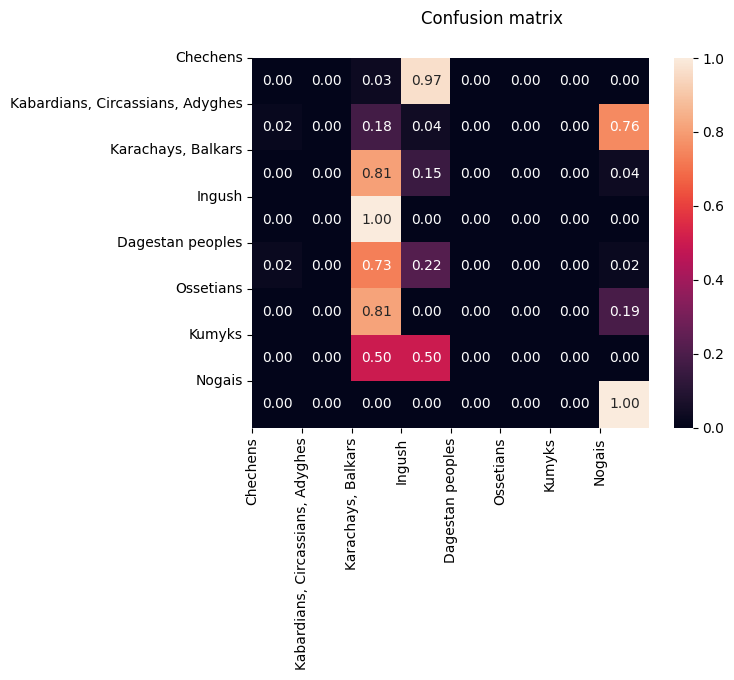

F1 score weighted: 0.06434224761326324
Step 1000
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.95      0.91      0.93        45
           2       0.96      0.92      0.94        26
           3       0.93      0.88      0.90        16
           4       0.97      0.93      0.95        41
           5       0.89      1.00      0.94        16
           6       0.62      0.83      0.71         6
           7       0.82      1.00      0.90         9

    accuracy                           0.93       188
   macro avg       0.89      0.93      0.91       188
weighted avg       0.94      0.93      0.93       188



<Figure size 640x480 with 0 Axes>

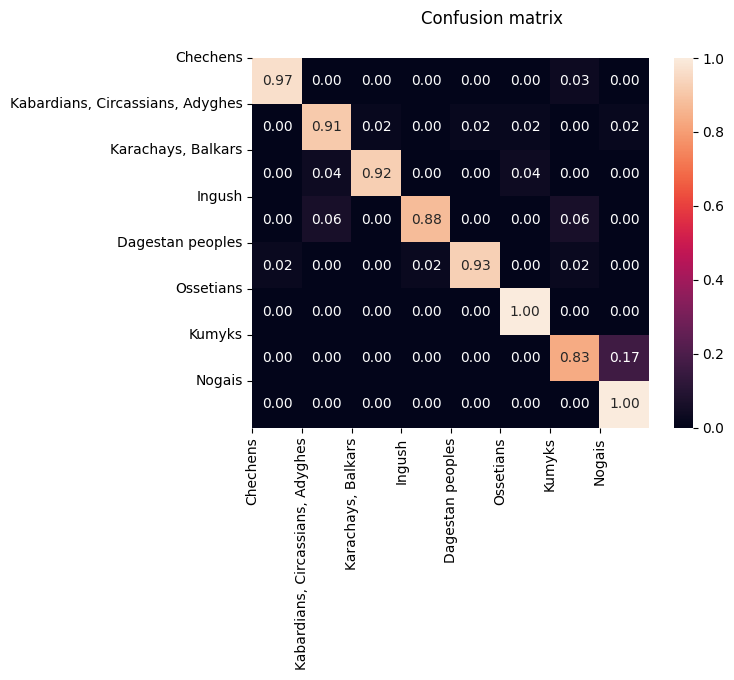

F1 score weighted: 0.9321731762524691
Step 2000
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.98      0.96      0.97        45
           2       0.96      0.92      0.94        26
           3       1.00      0.94      0.97        16
           4       0.97      0.95      0.96        41
           5       0.94      1.00      0.97        16
           6       0.62      0.83      0.71         6
           7       0.90      1.00      0.95         9

    accuracy                           0.95       188
   macro avg       0.92      0.95      0.93       188
weighted avg       0.96      0.95      0.95       188



<Figure size 640x480 with 0 Axes>

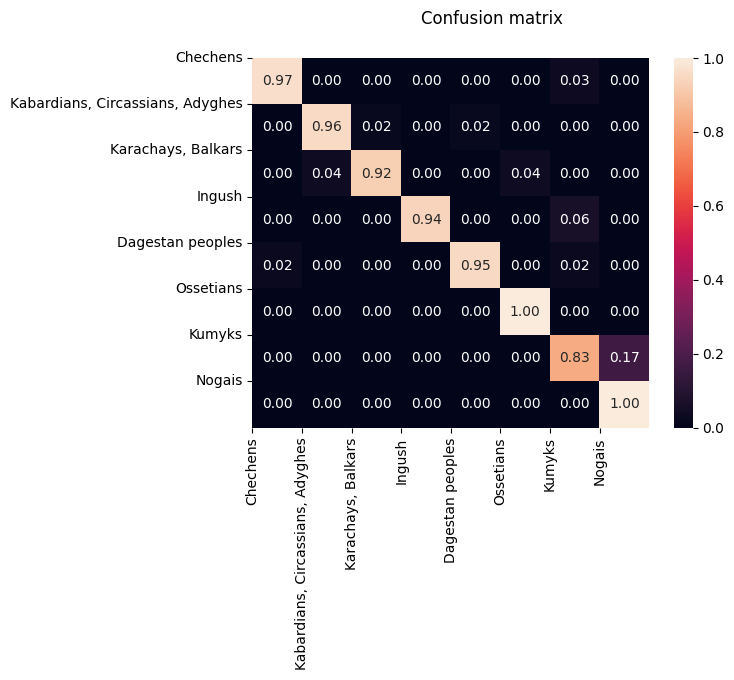

F1 score weighted: 0.9534375975652806
Step 3000
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.98      0.96      0.97        45
           2       0.96      0.92      0.94        26
           3       1.00      0.94      0.97        16
           4       0.97      0.95      0.96        41
           5       0.94      1.00      0.97        16
           6       0.71      0.83      0.77         6
           7       0.90      1.00      0.95         9

    accuracy                           0.95       188
   macro avg       0.93      0.95      0.93       188
weighted avg       0.95      0.95      0.95       188



<Figure size 640x480 with 0 Axes>

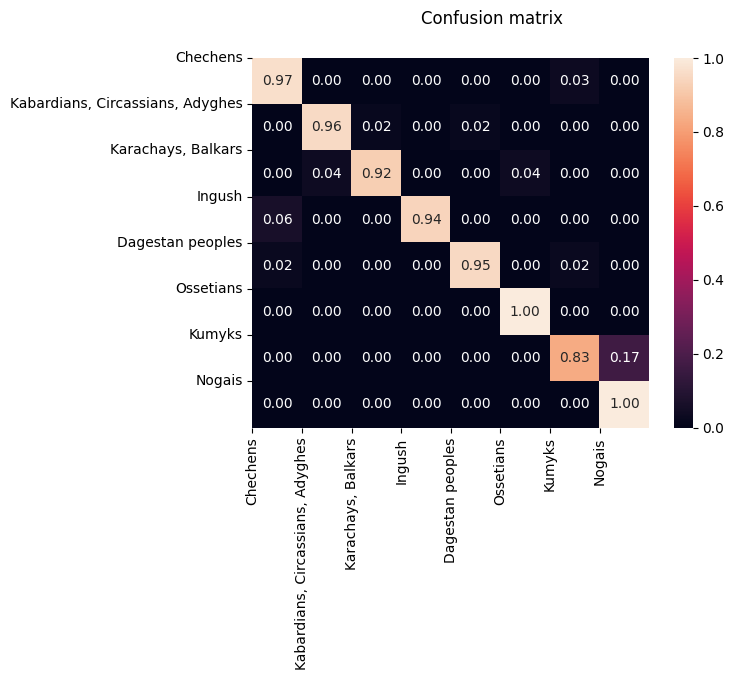

F1 score weighted: 0.9526668212806204
Step 4000
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.98      0.93      0.95        45
           2       0.96      0.92      0.94        26
           3       1.00      0.94      0.97        16
           4       0.97      0.95      0.96        41
           5       0.94      1.00      0.97        16
           6       0.71      0.83      0.77         6
           7       0.82      1.00      0.90         9

    accuracy                           0.95       188
   macro avg       0.91      0.94      0.93       188
weighted avg       0.95      0.95      0.95       188



<Figure size 640x480 with 0 Axes>

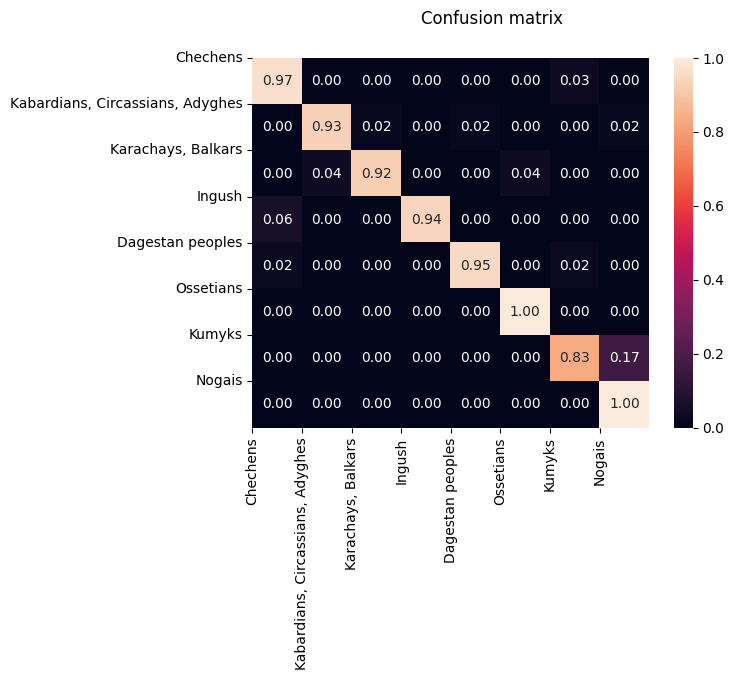

F1 score weighted: 0.9475874787149611
Step 5000
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.98      0.93      0.95        45
           2       0.96      0.92      0.94        26
           3       1.00      0.81      0.90        16
           4       0.95      0.98      0.96        41
           5       0.94      1.00      0.97        16
           6       0.71      0.83      0.77         6
           7       0.82      1.00      0.90         9

    accuracy                           0.94       188
   macro avg       0.91      0.93      0.92       188
weighted avg       0.95      0.94      0.94       188



<Figure size 640x480 with 0 Axes>

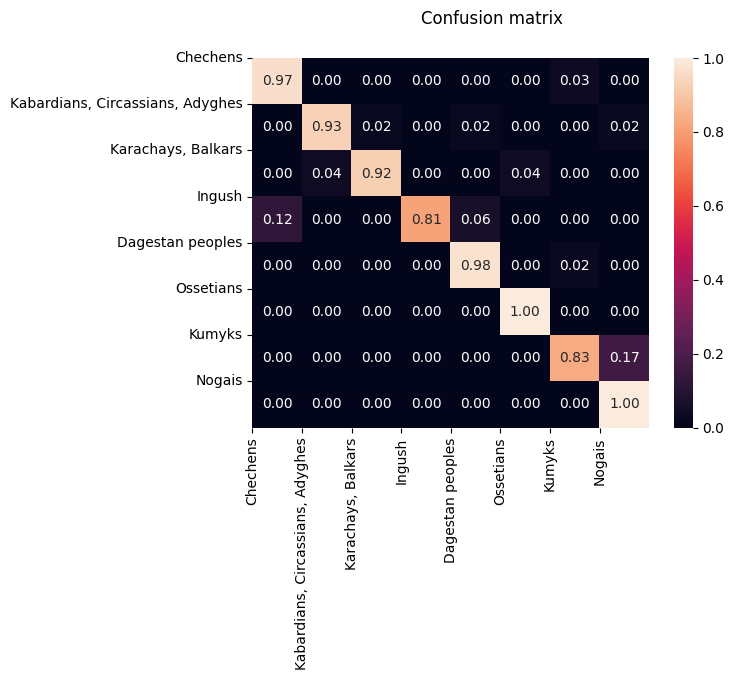

F1 score weighted: 0.9417233692795363


In [19]:
import gc
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score
from torch_geometric.nn import GCNConv, GATConv, TransformerConv, NNConv, SGConv, ARMAConv, TAGConv

types = ['Chechens', 'Kabardians, Circassians, Adyghes', 'Karachays, Balkars', 'Ingush', 'Dagestan peoples', 'Ossetians', 'Kumyks', 'Nogais']

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Define optimizer.

p_answers, p_true = [], []

def evaluation(model, test_graphs, step, p_answers, p_true):
    model.eval()
    y_true = []
    y_pred = []

    for i in range(len(test_graphs)):
        p = F.softmax(model(test_graphs[i].to(device))[-1], dim=0).cpu().detach().numpy()
        if step == 2000:
            p_answers.append(p)
        
        y_pred.append(np.argmax(p))
        y_true.append(test_graphs[i].y[-1].cpu().detach())
        
        if step == 2000:
            p_true.append(test_graphs[i].y[-1].cpu().detach())
    
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1)
    sns.heatmap(cm, annot=True, fmt=".2f", ax=ax)
    ax.set_xticks([i for i in range(len(types))])
    ax.set_xticklabels(types)
    ax.set_yticks([i for i in range(len(types))])
    ax.set_yticklabels(types)
    fig.suptitle("Confusion matrix")
    plt.yticks(rotation=0)
    plt.xticks(rotation=90) 
    plt.savefig(rf"C:\HSE\genotek\cm_cr_{step}.png", bbox_inches="tight")
    plt.show()
    
    print(f"F1 score weighted: {f1_score(y_true, y_pred, average='weighted')}")
    model.train()
    

def train(data, log_step, num_epochs, test_graphs, mask_array, p_answers, p_true):
    model.train()
    data =  data.to(device)
    for i in range(num_epochs):
        if i % log_step == 0:
            print(f'Step {i}')
            evaluation(model, test_graphs, i, p_answers, p_true)
        optimizer.zero_grad()  # Clear gradients.
        out = model(data)  # Perform a single forward pass.
        loss = criterion(out[mask_array], data.y[mask_array])  # Compute the loss solely based on the training nodes.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.

train(data, 1000, 6000, test_graphs, mask_array, p_answers, p_true)

model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

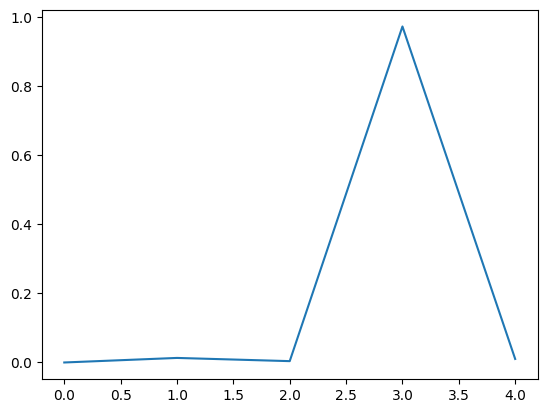

In [36]:
p_true = np.array(p_true)
p_true_idx = p_true == 3

p_answers_sel = np.sum(np.array(p_answers)[p_true_idx], axis=0) / len(p_true[p_true_idx])

plt.clf()
plt.plot(p_answers_sel)
plt.show()

In [35]:
p_answers[8]

array([9.5386422e-05, 1.9332339e-03, 9.9503303e-01, 1.5312919e-04,
       2.7852587e-03], dtype=float32)

# TripletLoss GNN

In [9]:
def _masked_minimum_torch(data, mask, dim=1):
    """Computes the axis wise minimum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the minimum.

    Returns:
      masked_minimums: N-D `Tensor`.
        The minimized dimension is of size 1 after the operation.
    """
    axis_maximums = torch.max(data, dim, keepdims=True)[0]
    masked_minimums = (
        torch.min(
            torch.multiply(data - axis_maximums, mask), dim, keepdims=True
        )[0]
        + axis_maximums
    )
    return masked_minimums


def _masked_maximum_torch(data, mask, dim=1):
    """Computes the axis wise maximum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the maximum.

    Returns:
      masked_maximums: N-D `Tensor`.
        The maximized dimension is of size 1 after the operation.
    """
    axis_minimums = torch.min(data, dim, keepdims=True)[0]
    masked_maximums = (
        torch.max(
            torch.multiply(data - axis_minimums, mask), dim, keepdims=True
        )[0]
        + axis_minimums
    )
    return masked_maximums

In [10]:
class TripletSemiHardLoss(nn.Module):
    def __init__(self, margin=0.2):
        super(TripletSemiHardLoss, self).__init__()
        
        self.margin = margin

    def forward(self, y_pred, y_true):
        labels = y_true
        embeddings = y_pred

        convert_to_float32 = (
            embeddings.dtype == torch.float16 or embeddings.dtype == torch.bfloat16
        )
        precise_embeddings = (
            embeddings.type(torch.float32) if convert_to_float32 else embeddings
        )

        # Reshape label tensor to [batch_size, 1].
        lshape = labels.shape
        labels = labels.view(lshape[0], 1)

        # Build pairwise squared distance matrix

        pdist_matrix = torch.cdist(precise_embeddings, precise_embeddings)
        
#         print(pdist_matrix)

        # Build pairwise binary adjacency matrix.
        adjacency = torch.eq(labels, labels.T).long()
#         print(adjacency)
        # Invert so we can select negatives only.
        adjacency_not = torch.logical_not(adjacency).long()
#         print(adjacency_not)

        batch_size = labels.shape[0]

        # Compute the mask.
        pdist_matrix_tile = torch.tile(pdist_matrix, (batch_size, 1))
#         print(pdist_matrix_tile)
        
        mask = torch.logical_and(
            torch.tile(adjacency_not, (batch_size, 1)),
            torch.gt(
                pdist_matrix_tile, pdist_matrix.T.reshape(-1, 1))
            ).long()
#         tf.print(mask)
        
        mask_final = torch.gt(
                torch.sum(
                    mask.type(torch.float32), axis=1, keepdims=True
                ),
                0.0,
            ).view((batch_size, batch_size))
        
#         print(mask_final)
        
        mask_final = mask_final.T

        adjacency_not = adjacency_not.type(torch.float32)
        mask = mask.type(torch.float32)

        # negatives_outside: smallest D_an where D_an > D_ap.
        negatives_outside = _masked_minimum_torch(pdist_matrix_tile, mask).view(batch_size, batch_size)
        
#         print(negatives_outside)
        
        negatives_outside = negatives_outside.T

        # negatives_inside: largest D_an.
        negatives_inside = torch.tile(
            _masked_maximum_torch(pdist_matrix, adjacency_not), (1, batch_size)
        )
#         print(negatives_inside)
        
        semi_hard_negatives = torch.where(mask_final, negatives_outside, negatives_inside)
        
#         print(semi_hard_negatives)

        loss_mat = torch.add(self.margin, pdist_matrix - semi_hard_negatives)
    
#         print(loss_mat)

        mask_positives = adjacency.type(torch.float32) - torch.diag(
            torch.ones(batch_size).to('cuda')
        )
    
#         print(mask_positives)

        # In lifted-struct, the authors multiply 0.5 for upper triangular
        #   in semihard, they take all positive pairs except the diagonal.
        num_positives = torch.sum(mask_positives)
        
#         print(num_positives)

        triplet_loss = torch.true_divide(
            torch.sum(
                torch.maximum(tmp := torch.multiply(loss_mat, mask_positives), torch.zeros(tmp.shape).to('cuda'))
            ),
            num_positives,
        )
    
#         print(
#                 torch.max(tmp := torch.multiply(loss_mat, mask_positives), torch.zeros(tmp.shape).to('cuda'))[0]
#             )
    ################################TF###############################
#         triplet_loss = tf.math.truediv(
#             tf.math.reduce_sum(
#                 tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
#             ),
#             num_positives,
#         )
    ###############################TF#######################################
    
#         print(triplet_loss)

        if convert_to_float32:
            return triplet_loss.type(embeddings.dtype)
        else:
            return triplet_loss

In [12]:
# Implementation with TripletLoss

import gc
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score
from torch_geometric.nn import GCNConv, GATConv, TransformerConv, NNConv, SGConv, ARMAConv, TAGConv
from torch.nn import Linear


# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, 128)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Net().to(device)

criterion = TripletSemiHardLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Define optimizer.

p_answers, p_true = [], []    

def train(data, log_step, num_epochs, test_graphs, mask_array, p_answers, p_true):
    model.train()
    data =  data.to(device)
    for i in range(num_epochs):
        optimizer.zero_grad()  # Clear gradients.
        out = model(data)  # Perform a single forward pass.
        loss = criterion(out[mask_array], data.y[mask_array])  # Compute the loss solely based on the training nodes.
        print(loss)
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.

train(data, 1000, 200, test_graphs, mask_array, p_answers, p_true)

# model = None
# gc.collect() # Python thing
# torch.cuda.empty_cache() # PyTorch thing

tensor(0.1967, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1961, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1950, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1924, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1868, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1761, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1601, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1458, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1299, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1256, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1250, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1114, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1252, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1198, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1036, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1073, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0932, device='cuda:0', grad_fn=<DivBack

tensor(0.0007, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<DivBack

In [11]:
mask_array

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [13]:
from sklearn.manifold import TSNE

def evaluation(model, data, test_graphs):
    model.eval()

    embeddings = model(data.to(device)).cpu().detach().numpy()
    
    print(embeddings.shape)
    
    tsne = TSNE(n_components=2, learning_rate=10, init='random', perplexity=30)
    
    tsne_embeddings = tsne.fit_transform(embeddings)
    
    axis1 = 1
    axis2 = 120
    
    plt.clf()
    plt.scatter(*tsne_embeddings.T)
#     plt.scatter(embeddings[:, axis1], embeddings[:, axis2])
    plt.show()

(752, 128)


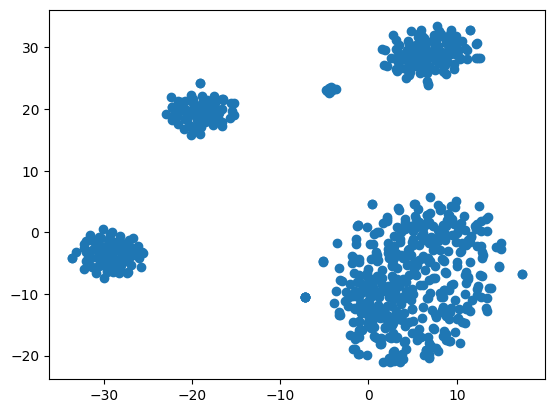

In [14]:
evaluation(model, data, test_graphs)

In [79]:
output = torch.rand(10, 128)
targets = torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [80]:
tl = TripletSemiHardLoss()

In [81]:
tl(output, targets)

tensor(0.0207)

In [14]:
a = (1, 2)
b = (a, 3)
b

((1, 2), 3)

In [33]:
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
output = torch.cdist(input1, input2)

output.shape

torch.Size([100, 100])

In [61]:
x = tf.constant([[5, 4, 6], [5, 4, 6], [5, 4, 6]])
print(tf.size(x))
y = tf.reshape(tf.constant([5, 2, 5, 5, 2, 5, 5, 2, 5]), [-1, 1])
tf.math.greater(x, y)

tf.Tensor(9, shape=(), dtype=int32)


InvalidArgumentError: {{function_node __wrapped__Greater_device_/job:localhost/replica:0/task:0/device:GPU:0}} Incompatible shapes: [3,3] vs. [9,1]
	 [[{{node Greater}}]] [Op:Greater]

# Tensorflow TripletLoss vs Pytorch TripletLoss

In [12]:
import tensorflow as tf
from tensorflow_addons.losses import metric_learning
from tensorflow_addons.utils.keras_utils import LossFunctionWrapper
from tensorflow_addons.utils.types import FloatTensorLike, TensorLike
from typeguard import typechecked
from typing import Optional, Union, Callable

In [104]:
def _masked_maximum(data, mask, dim=1):
    """Computes the axis wise maximum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the maximum.

    Returns:
      masked_maximums: N-D `Tensor`.
        The maximized dimension is of size 1 after the operation.
    """
    axis_minimums = tf.math.reduce_min(data, dim, keepdims=True)
    masked_maximums = (
        tf.math.reduce_max(
            tf.math.multiply(data - axis_minimums, mask), dim, keepdims=True
        )
        + axis_minimums
    )
    return masked_maximums


def _masked_minimum(data, mask, dim=1):
    """Computes the axis wise minimum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the minimum.

    Returns:
      masked_minimums: N-D `Tensor`.
        The minimized dimension is of size 1 after the operation.
    """
    axis_maximums = tf.math.reduce_max(data, dim, keepdims=True)
    masked_minimums = (
        tf.math.reduce_min(
            tf.math.multiply(data - axis_maximums, mask), dim, keepdims=True
        )
        + axis_maximums
    )
    return masked_minimums


def triplet_semihard_loss(
    y_true: TensorLike,
    y_pred: TensorLike,
    margin: FloatTensorLike = 0.2,
    distance_metric: Union[str, Callable] = "L2",
) -> tf.Tensor:
    r"""Computes the triplet loss with semi-hard negative mining.

    Usage:

    >>> y_true = tf.convert_to_tensor([0, 0])
    >>> y_pred = tf.convert_to_tensor([[0.0, 1.0], [1.0, 0.0]])
    >>> tfa.losses.triplet_semihard_loss(y_true, y_pred, distance_metric="L2")
    <tf.Tensor: shape=(), dtype=float32, numpy=2.4142137>

    >>> # Calling with callable `distance_metric`
    >>> distance_metric = lambda x: tf.linalg.matmul(x, x, transpose_b=True)
    >>> tfa.losses.triplet_semihard_loss(y_true, y_pred, distance_metric=distance_metric)
    <tf.Tensor: shape=(), dtype=float32, numpy=1.0>

    Args:
      y_true: 1-D integer `Tensor` with shape `[batch_size]` of
        multiclass integer labels.
      y_pred: 2-D float `Tensor` of embedding vectors. Embeddings should
        be l2 normalized.
      margin: Float, margin term in the loss definition.
      distance_metric: `str` or a `Callable` that determines distance metric.
        Valid strings are "L2" for l2-norm distance,
        "squared-L2" for squared l2-norm distance,
        and "angular" for cosine similarity.

        A `Callable` should take a batch of embeddings as input and
        return the pairwise distance matrix.

    Returns:
      triplet_loss: float scalar with dtype of `y_pred`.
    """
    labels = tf.convert_to_tensor(y_true, name="labels")
    embeddings = tf.convert_to_tensor(y_pred, name="embeddings")

    convert_to_float32 = (
        embeddings.dtype == tf.dtypes.float16 or embeddings.dtype == tf.dtypes.bfloat16
    )
    precise_embeddings = (
        tf.cast(embeddings, tf.dtypes.float32) if convert_to_float32 else embeddings
    )

    # Reshape label tensor to [batch_size, 1].
    lshape = tf.shape(labels)
    labels = tf.reshape(labels, [lshape[0], 1])

    # Build pairwise squared distance matrix

    if distance_metric == "L2":
        pdist_matrix = metric_learning.pairwise_distance(
            precise_embeddings, squared=False
        )
        
#         tf.print(pdist_matrix)

    elif distance_metric == "squared-L2":
        pdist_matrix = metric_learning.pairwise_distance(
            precise_embeddings, squared=True
        )

    elif distance_metric == "angular":
        pdist_matrix = metric_learning.angular_distance(precise_embeddings)

    else:
        pdist_matrix = distance_metric(precise_embeddings)

    # Build pairwise binary adjacency matrix.
    adjacency = tf.math.equal(labels, tf.transpose(labels))
#     tf.print(adjacency)
    # Invert so we can select negatives only.
    adjacency_not = tf.math.logical_not(adjacency)
#     tf.print(adjacency_not)

    batch_size = tf.size(labels)

    # Compute the mask.
    pdist_matrix_tile = tf.tile(pdist_matrix, [batch_size, 1])
#     tf.print(pdist_matrix_tile)
    
    mask = tf.math.logical_and(
        tf.tile(adjacency_not, [batch_size, 1]),
        tf.math.greater(
            pdist_matrix_tile, tf.reshape(tf.transpose(pdist_matrix), [-1, 1])
        ),
    )
#     tf.print(mask)
    mask_final = tf.reshape(
        tf.math.greater(
            tf.math.reduce_sum(
                tf.cast(mask, dtype=tf.dtypes.float32), 1, keepdims=True
            ),
            0.0,
        ),
        [batch_size, batch_size],
    )
#     tf.print(mask_final)
    
    mask_final = tf.transpose(mask_final)

    adjacency_not = tf.cast(adjacency_not, dtype=tf.dtypes.float32)
    mask = tf.cast(mask, dtype=tf.dtypes.float32)

    # negatives_outside: smallest D_an where D_an > D_ap.
    negatives_outside = tf.reshape(
        _masked_minimum(pdist_matrix_tile, mask), [batch_size, batch_size]
    )
#     tf.print(negatives_outside)
    
    negatives_outside = tf.transpose(negatives_outside)

    # negatives_inside: largest D_an.
    negatives_inside = tf.tile(
        _masked_maximum(pdist_matrix, adjacency_not), [1, batch_size]
    )
#     tf.print(negatives_inside)
    semi_hard_negatives = tf.where(mask_final, negatives_outside, negatives_inside)
    
#     tf.print(semi_hard_negatives)

    loss_mat = tf.math.add(margin, pdist_matrix - semi_hard_negatives)
    
#     tf.print(loss_mat)

    mask_positives = tf.cast(adjacency, dtype=tf.dtypes.float32) - tf.linalg.diag(
        tf.ones([batch_size])
    )
    
#     tf.print(mask_positives)

    # In lifted-struct, the authors multiply 0.5 for upper triangular
    #   in semihard, they take all positive pairs except the diagonal.
    num_positives = tf.math.reduce_sum(mask_positives)
    
#     tf.print(num_positives)

    triplet_loss = tf.math.truediv(
        tf.math.reduce_sum(
            tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
        ),
        num_positives,
    )
    
#     tf.print(
#             tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
#         )
    
#     tf.print(triplet_loss)

    if convert_to_float32:
        return tf.cast(triplet_loss, embeddings.dtype)
    else:
        return triplet_loss

In [18]:
test_array_x = np.random.random_sample((100, 128)).astype(np.float64)
test_array_y = np.array([0 for i in range(25)] + [1 for i in range(25)] + [2 for i in range(25)] + [3 for i in range(25)]).astype(np.float64)

In [105]:
with tf.device('CPU'):
    tf.print(triplet_semihard_loss(tf.cast(tf.convert_to_tensor(test_array_y), tf.float32), tf.cast(tf.convert_to_tensor(test_array_x), tf.float32)))

[[0 0.198365405 0.316806972 ... 0 0 0]
 [0.196273044 0 0.170718387 ... 0 0 0]
 [0.224508 0.178384498 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0.188140586 0.184802726]
 [0 0 0 ... 0.194748595 0 0.184892371]
 [0 0 0 ... 0.197816089 0.194497779 0]]
0.187194243


In [110]:
criterion = TripletSemiHardLoss()

In [111]:
criterion(torch.tensor(test_array_x).to('cuda'), torch.tensor(test_array_y).to('cuda'))

tensor([0.0000, 0.1984, 0.3168, 0.1888, 0.1955, 0.1829, 0.1981, 0.1858, 0.1992,
        0.1648, 0.1926, 0.1838, 0.1697, 0.1981, 0.1974, 0.1988, 0.1834, 0.1898,
        0.1936, 0.1844, 0.1909, 0.1806, 0.1921, 0.1692, 0.1999, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], device='cuda:0', dtype=torch.float64)


tensor(0.1872, device='cuda:0', dtype=torch.float64)

Testing

In [62]:
model.eval()

Net(
  (conv1): GCNConv(5, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 5)
)

In [69]:
from sklearn.metrics import f1_score
y_true = []
y_pred = []

for i in range(len(test_graphs)):
    y_pred.append(np.argmax(F.softmax(model(test_graphs[i])[-1], dim=0).cpu().detach().numpy()))
    y_true.append(test_graphs[i].y[-1])
    
print(classification_report(y_true, y_pred))

print(confusion_matrix(y_true, y_pred))

print(f1_score(y_true, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.50      0.02      0.04        47
           2       0.83      0.12      0.20        43
           3       0.70      0.99      0.82       218
           4       0.89      0.78      0.83        64

    accuracy                           0.73       379
   macro avg       0.78      0.58      0.58       379
weighted avg       0.73      0.73      0.66       379

[[  7   0   0   0   0]
 [  0   1   1  43   2]
 [  0   0   5  36   2]
 [  0   1   0 215   2]
 [  0   0   0  14  50]]
0.6576256956227116


In [54]:
test_graphs[0].y

tensor([3, 3, 4,  ..., 1, 1, 3])

## Real example (old)

In [82]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
df_new = pd.concat([n, l], axis=1)
df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
df_new = df_new.sort_values(by=[0])
df_new = df_new.drop_duplicates()
df_new.iloc[:, 1].to_numpy()

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
class MyDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(MyDataset, self).__init__('.', transform, None, None)

        df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
        
        types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()

        edge_index = torch.zeros((2, df.shape[0]), dtype=torch.long)
        edge_attr = torch.zeros((df.shape[0],), dtype=torch.float)
        
        n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
        l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
        df_new = pd.concat([n, l], axis=1)
        df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
        df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
        df_new = df_new.sort_values(by=[0])
        df_new = df_new.drop_duplicates()
        y = torch.from_numpy(df_new.iloc[:, 1].to_numpy()).type(torch.long)

        for i in range(df.shape[0]):
            edge_index[:, i] = torch.tensor([int(df.iloc[i, 0].split('_')[1]), int(df.iloc[i, 1].split('_')[1])])
            edge_attr[i] = df.iloc[i, 4]

        data = Data(edge_attr=edge_attr, edge_index=edge_index, y=y)
        
        print(data)
        
        data.num_nodes = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
        
        data.num_classes = len(types)

#         # splitting the data into train, validation and test
#         X_train, X_test, y_train, y_test = train_test_split(edge_attr, 
#                                                             y,
#                                                             test_size=0.30, 
#                                                             random_state=42)
        
#         n_nodes = len(y)
        
#         # create train and test masks for data
#         train_mask = torch.zeros(n_nodes, dtype=torch.bool)
#         test_mask = torch.zeros(n_nodes, dtype=torch.bool)
#         train_mask[X_train.index] = True
#         test_mask[X_test.index] = True
#         data['train_mask'] = train_mask
#         data['test_mask'] = test_mask

#         self.data, self.slices = self.collate([data])

    def _download(self):
        return

    def _process(self):
        return

    def __repr__(self):
        return '{}()'.format(self.__class__.__name__)



dataset = MyDataset()
print(dataset)
data = dataset[0]

Data(edge_index=[2, 67503], edge_attr=[67503], y=[3767])
MyDataset()


In [34]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
        
types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()

edge_index = torch.zeros((2, df.shape[0]), dtype=torch.long)
edge_attr = torch.zeros((df.shape[0],), dtype=torch.float)

n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
df_new = pd.concat([n, l], axis=1)
df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
df_new = df_new.sort_values(by=[0])
df_new = df_new.drop_duplicates()
y = torch.from_numpy(df_new.iloc[:, 1].to_numpy()).type(torch.long)

for i in range(df.shape[0]):
    edge_index[:, i] = torch.tensor([int(df.iloc[i, 0].split('_')[1]), int(df.iloc[i, 1].split('_')[1])])
    edge_attr[i] = df.iloc[i, 4]

data = Data(x=torch.from_numpy(np.expand_dims(df_new.iloc[:, 1].to_numpy(), axis=-1)).type(torch.float), edge_attr=edge_attr, edge_index=edge_index, y=y)

data.num_nodes = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
        
data.num_classes = len(types)

In [35]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self, edge_index):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data =  data.to(device)

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out= model(data.edge_index)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

for epoch in range(401):
    loss = train(data)
    print(loss)

tensor(2.1050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6992, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5544, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3257, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2880, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2498, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2385, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2469, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2266, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2168, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2021, device='cuda:0', grad_fn=

tensor(1.0949, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0999, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0951, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0995, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0993, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0947, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0966, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0975, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1005, device='cuda:0', grad_fn=

tensor(1.0863, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0919, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0837, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0891, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0884, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0868, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0845, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0874, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0881, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0871, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0872, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0840, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0864, device='cuda:0', grad_fn=

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=2)
X, y = np.arange(18).reshape((6, 3)), [0, 0, 0, 0, 1, 1]

a, b = split.split(X, y)
X[a[0]]

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [15, 16, 17]])

In [35]:
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)

NameError: name 'StratifiedKFold' is not defined

In [18]:
edge_index.t().contiguous()

tensor([[   0,    5],
        [   0,   10],
        [   0,   11],
        ...,
        [3749, 3764],
        [3754, 3755],
        [3758, 3766]])

[How to get rbf_kernel_safe](https://stackoverflow.com/questions/52057836/labelpropagation-how-to-avoid-division-by-zero)

# NC

In [12]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


In [13]:
len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())

3767

## Get distribution

In [14]:
nodes_names = set()
all_types_dict = {}

types = df['label_id1'].unique().tolist()

for t in types:
    all_types_dict[t] = 0

for i, n in enumerate(df['node_id1']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id1'][i]] += 1
        
for i, n in enumerate(df['node_id2']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id2'][i]] += 1
        
print(all_types_dict)

{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}


## Training and results

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        74
           1       0.87      0.67      0.76       111
           2       0.98      0.75      0.85        67
           3       1.00      0.43      0.60        42
           4       0.50      0.97      0.66        80
           5       0.94      0.42      0.59        40
           6       1.00      0.27      0.43        11
           7       0.78      0.41      0.54        17

    accuracy                           0.72       442
   macro avg       0.85      0.61      0.65       442
weighted avg       0.81      0.72      0.71       442

{'0': {'precision': 0.693069306930693, 'recall': 0.9459459459459459, 'f1-score': 0.8, 'support': 74}, '1': {'precision': 0.8705882352941177, 'recall': 0.6666666666666666, 'f1-score': 0.7551020408163265, 'support': 111}, '2': {'precision': 0.9803921568627451, 'recall': 0.746268656716418, 'f1-score': 0.847457627118644, 'support': 67}, '3': {'precisi

<Figure size 432x288 with 0 Axes>

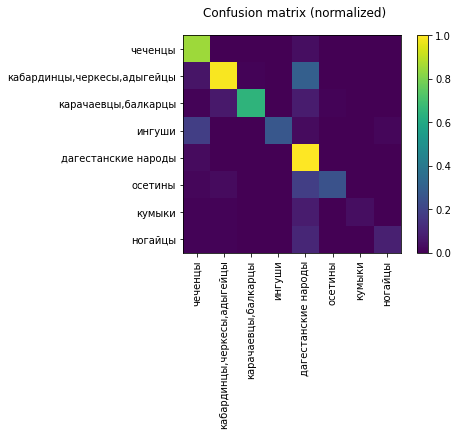

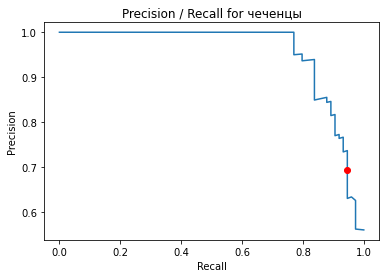

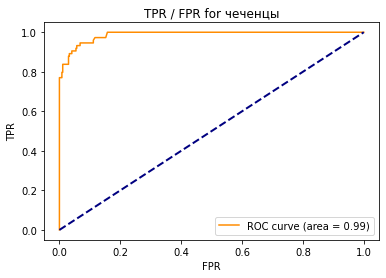

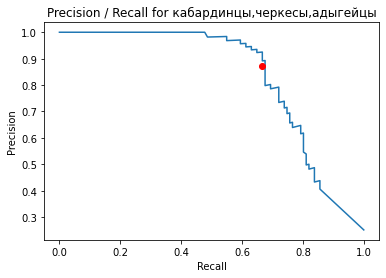

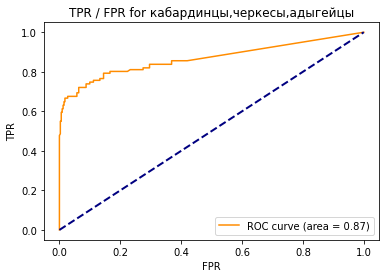

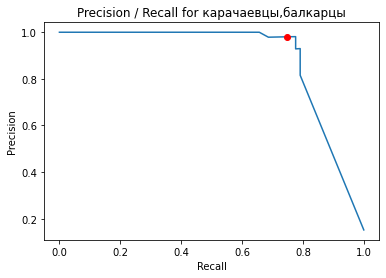

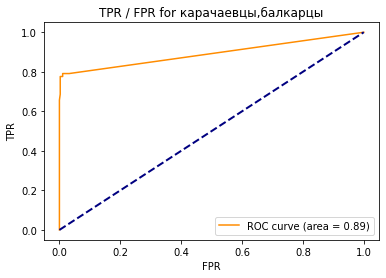

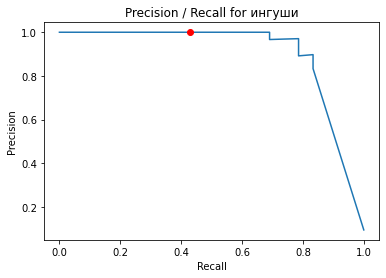

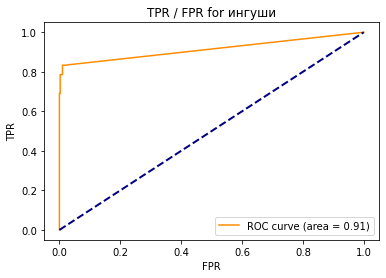

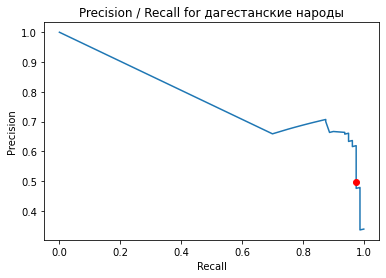

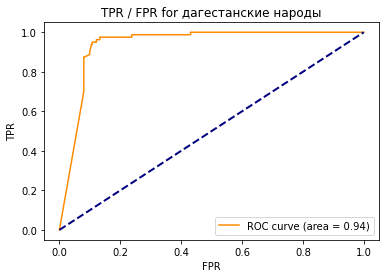

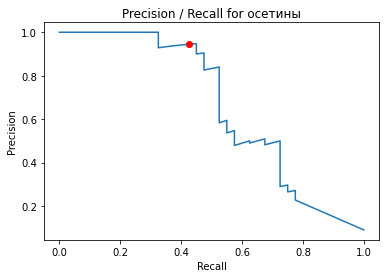

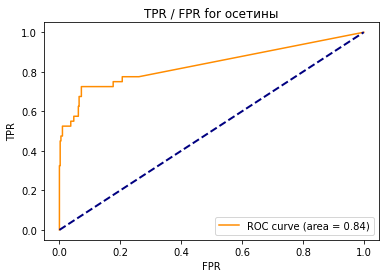

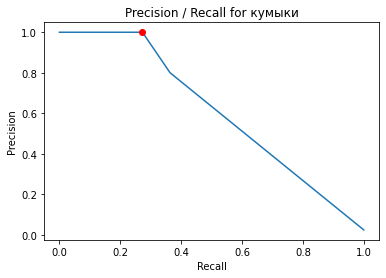

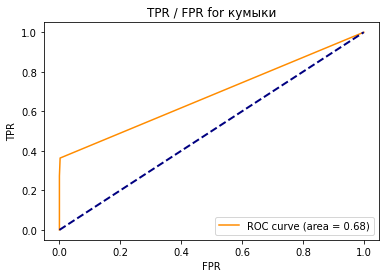

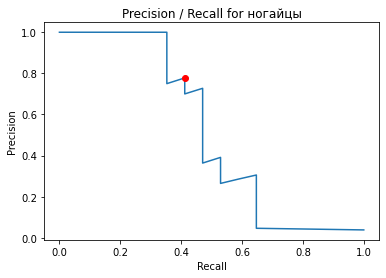

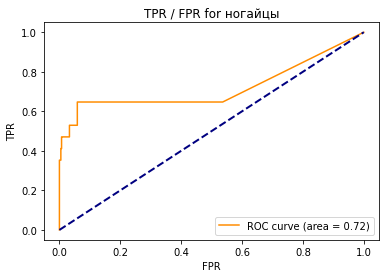

In [91]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            nodes_dict[n] = [types_dict.copy(), id_]
        
    return nodes_dict

data = get_dataset(df, 0.2) # second number - the part of training data

inputs = [list(i[0].values()) for i in list(data.values())]
targets = [i[1] for i in list(data.values())]

def rbf_kernel_safe(X, Y=None, gamma=None): 

    X, Y = sklearn.metrics.pairwise.check_pairwise_arrays(X, Y) 
    if gamma is None: 
        gamma = 1.0 / X.shape[1] 

    K = sklearn.metrics.pairwise.euclidean_distances(X, Y, squared=True) 
    K *= -gamma 
    K -= K.max()
    np.exp(K, K)    # exponentiate K in-place 
    return K 

# label_prop_model = LabelSpreading(kernel=rbf_kernel_safe, max_iter=1000, tol=1e-3, n_jobs=-1, gamma=200)
label_prop_model = LabelSpreading(kernel='knn', max_iter=1000, tol=1e-3, n_jobs=-1, n_neighbors=11, gamma=100)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

unlabeled_targets = np.array(targets) == -1

data = get_dataset(df, 2) # second number - whatever number > 1 because we need to select all data

targets = np.array([i[1] for i in list(data.values())])

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets, predicted, labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(8)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(8)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_nc.png", bbox_inches="tight")
plt.show()

for i in range(8):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()